In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input, Concatenate, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# import dataset
df = pd.read_excel('DataSet_v1.xlsx', skiprows=3).drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(667, 16)


,ID,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Final average,Target,Output Feature 2
0,1,2022,ISI,M,9,19.0,17.0,12.0,13.0,19,12.0,19,17,13.40,Approved,Complete
1,2,2022,ISI,F,15,20.0,20.0,20.0,20.0,18,14.0,20,19,17.90,Approved,Complete
2,3,2022,ISI,M,6,0.0,0.0,5.0,6.0,14,6.0,11,10,5.05,Disapproved,Complete
3,4,2022,ISI,M,20,20.0,20.0,20.0,20.0,20,18.0,20,19,19.50,Approved,Complete
4,5,2022,ISI,M,6,16.0,15.0,7.0,17.0,18,7.0,16,12,11.60,Disapproved,Complete


##### Initial Analysis

In [4]:
# check for missing values
df.isnull().sum()

ID                          0
Year of Income              0
Career                      0
Gender                      0
Qualified Practice 1        0
Partial Task                2
Midterm Exam                2
Qualified Practice 2        0
Final Task                  2
Participation in Class      0
Final Exam                  0
Linguistic Comprehension    0
Mathematic                  0
Final average               0
Target                      0
Output Feature 2            0
dtype: int64

In [5]:
# check missing percentage
df.isnull().sum()/df.shape[0]*100

ID                          0.00000
Year of Income              0.00000
Career                      0.00000
Gender                      0.00000
Qualified Practice 1        0.00000
Partial Task                0.29985
Midterm Exam                0.29985
Qualified Practice 2        0.00000
Final Task                  0.29985
Participation in Class      0.00000
Final Exam                  0.00000
Linguistic Comprehension    0.00000
Mathematic                  0.00000
Final average               0.00000
Target                      0.00000
Output Feature 2            0.00000
dtype: float64

Since its less than 1 percent, we can drop the rows with missing values.

In [6]:
# drop missing values
df.dropna(inplace=True)

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check data types
df.dtypes

ID                            int64
Year of Income                int64
Career                       object
Gender                       object
Qualified Practice 1          int64
Partial Task                float64
Midterm Exam                float64
Qualified Practice 2        float64
Final Task                  float64
Participation in Class        int64
Final Exam                  float64
Linguistic Comprehension      int64
Mathematic                    int64
Final average               float64
Target                       object
Output Feature 2             object
dtype: object

In [9]:
# convert year to categorical
df['Year of Income'] = df['Year of Income'].astype('object')

In [10]:
# check number of unique values
df.nunique()

ID                          661
Year of Income                3
Career                        3
Gender                        2
Qualified Practice 1         21
Partial Task                  9
Midterm Exam                 21
Qualified Practice 2         24
Final Task                   15
Participation in Class       13
Final Exam                   23
Linguistic Comprehension     20
Mathematic                   19
Final average               177
Target                        2
Output Feature 2              2
dtype: int64

We see ID is a unique identifier for each row. We can drop it as it does not add any value to our analysis. We will also drop Output Feature 2 as we are not going to use it in our analysis.

In [11]:
# drop redundant columns
df.drop(['ID', 'Output Feature 2','Final average'], axis=1, inplace=True)

In [12]:
df.head()

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Target
0,2022,ISI,M,9,19.0,17.0,12.0,13.0,19,12.0,19,17,Approved
1,2022,ISI,F,15,20.0,20.0,20.0,20.0,18,14.0,20,19,Approved
2,2022,ISI,M,6,0.0,0.0,5.0,6.0,14,6.0,11,10,Disapproved
3,2022,ISI,M,20,20.0,20.0,20.0,20.0,20,18.0,20,19,Approved
4,2022,ISI,M,6,16.0,15.0,7.0,17.0,18,7.0,16,12,Disapproved


##### Univariate Analysis of Numerical Features

Feature Name: Qualified Practice 1
Mean: 12.198184568835098
Median: 13.0
Standard Deviation: 6.192497638453004
Minimum: 0
Maximum: 20
Skewness: -0.28684268074828206
Kurtosis: -1.067693743032935


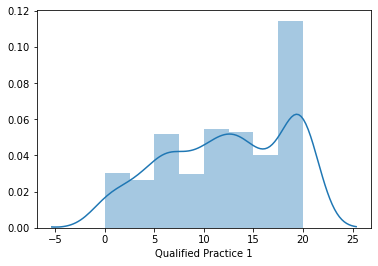

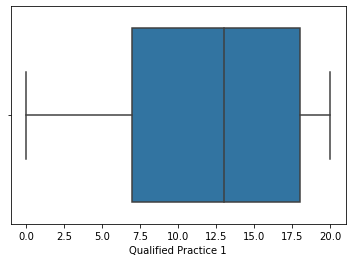

----------------------------------------
Feature Name: Partial Task
Mean: 17.89409984871407
Median: 18.0
Standard Deviation: 2.1357657733234685
Minimum: 0.0
Maximum: 20.0
Skewness: -3.7954802882639673
Kurtosis: 28.171000611134698


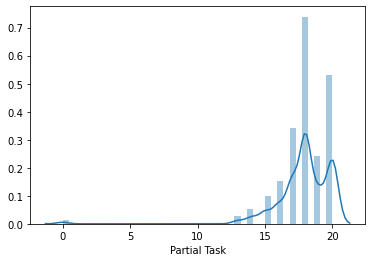

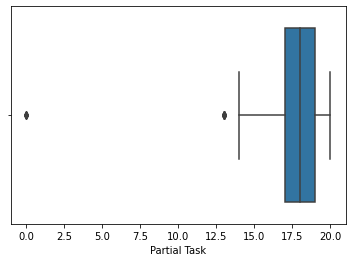

----------------------------------------
Feature Name: Midterm Exam
Mean: 12.399394856278366
Median: 13.0
Standard Deviation: 5.909745387268121
Minimum: 0.0
Maximum: 20.0
Skewness: -0.49317840413966296
Kurtosis: -0.7294444667049187


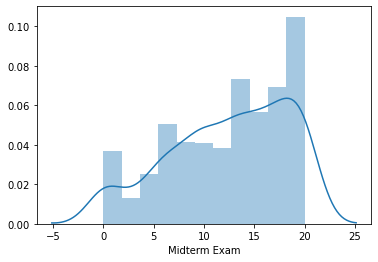

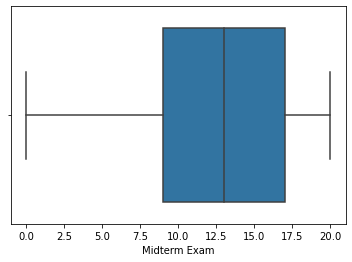

----------------------------------------
Feature Name: Qualified Practice 2
Mean: 11.786686838124055
Median: 12.0
Standard Deviation: 6.493169236482225
Minimum: 0.0
Maximum: 20.0
Skewness: -0.3115974873552572
Kurtosis: -1.0848881474221101


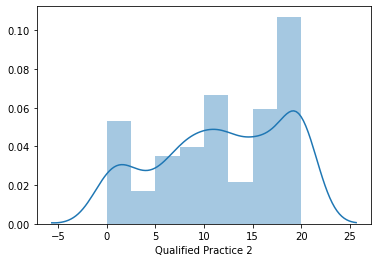

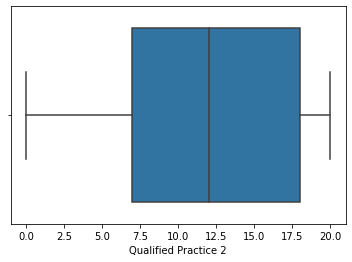

----------------------------------------
Feature Name: Final Task
Mean: 14.94251134644478
Median: 17.0
Standard Deviation: 6.078752791631274
Minimum: 0.0
Maximum: 20.0
Skewness: -1.5654631700434527
Kurtosis: 1.339610510734817


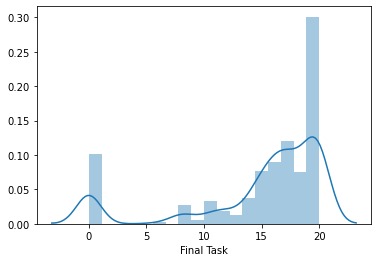

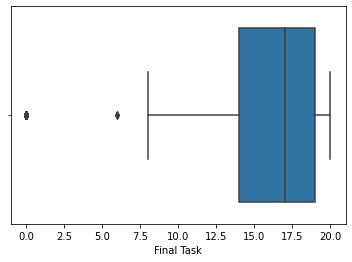

----------------------------------------
Feature Name: Participation in Class
Mean: 15.441754916792739
Median: 17.0
Standard Deviation: 5.926188355996818
Minimum: 0
Maximum: 20
Skewness: -1.9561600006011544
Kurtosis: 2.46570940729713


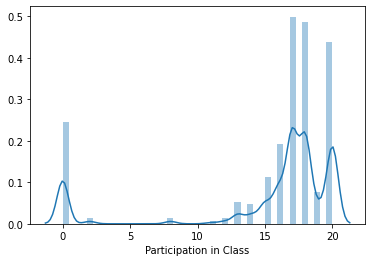

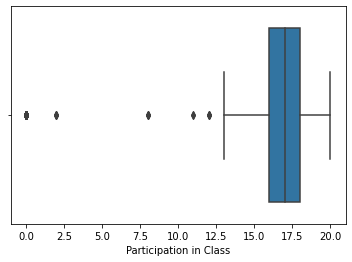

----------------------------------------
Feature Name: Final Exam
Mean: 11.506807866868382
Median: 13.0
Standard Deviation: 6.034524329701249
Minimum: 0.0
Maximum: 20.0
Skewness: -0.5413677227914011
Kurtosis: -0.6949392591499155


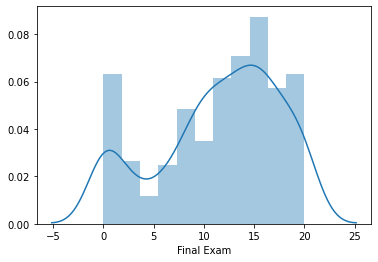

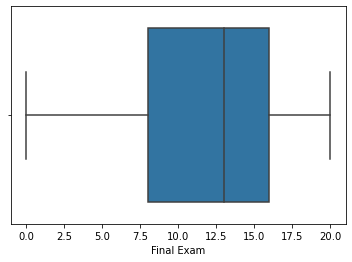

----------------------------------------
Feature Name: Linguistic Comprehension
Mean: 16.350983358547655
Median: 17.0
Standard Deviation: 3.351745782292661
Minimum: 0
Maximum: 20
Skewness: -2.262611977308779
Kurtosis: 6.687417306423473


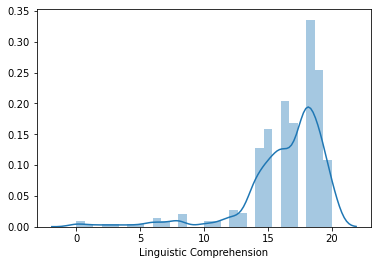

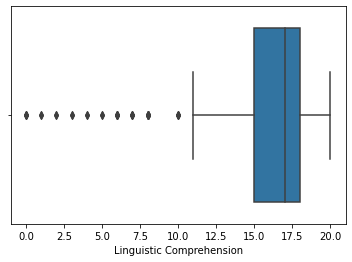

----------------------------------------
Feature Name: Mathematic
Mean: 15.86535552193646
Median: 17.0
Standard Deviation: 3.622115705498472
Minimum: 1
Maximum: 20
Skewness: -1.709220467531136
Kurtosis: 3.606638316138302


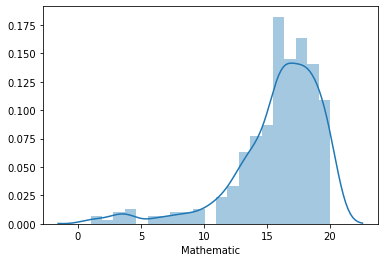

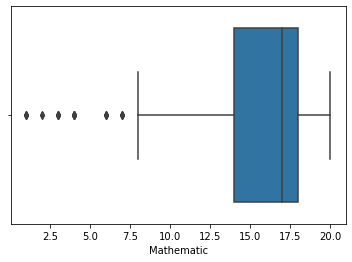

----------------------------------------


In [13]:
# Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print('Feature Name:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    print('Skewness:', df[col].skew())
    print('Kurtosis:', df[col].kurtosis())
    sns.distplot(df[col], kde=True)
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print('----------------------------------------')

In [14]:
#Observations
#- Qualififed Practice 1 and 2 seems normally distributed with no presence of outliers.
#- Partial Task seems negatively skewed with presence of outliers. This indicate more students tend to achieve higher scores.
#- Midterm Exam seems normally distributed with no presence of outliers.
#- Final Task seems negatively skewed but no presence of outliers can be observed.
#- Participation in Class seems negatively skewed with presence of outliers. A high number of students can be observed with next to zero participation.
#- Final Exam seems normally distributed with no presence of outliers.
#- Linguistic Comprehension and Mathematics seems negatively skewed with presence of outliers.
#- Output is normally distributed with no outliers.

# Univariate Analysis of Categorical Features

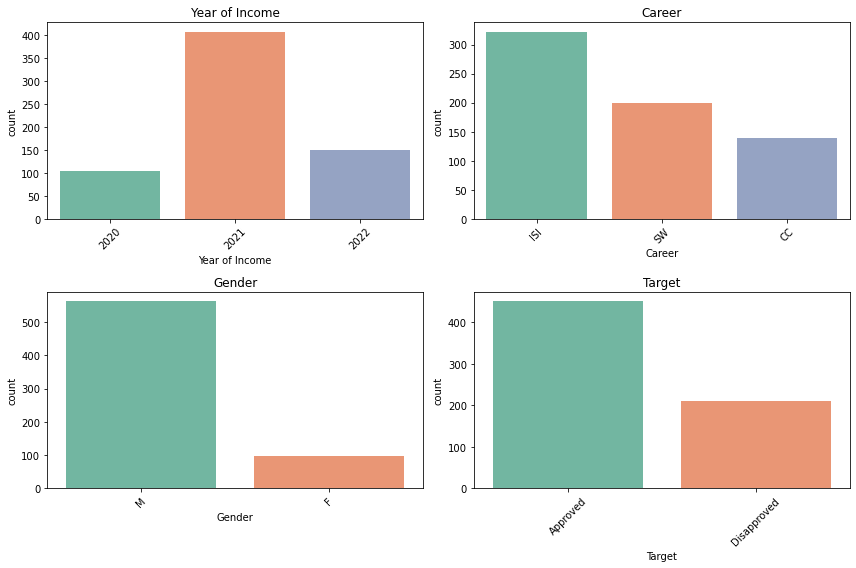

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns

plot_count = 1
plt.figure(figsize = (12,8))
for col in cat_cols:
    plt.subplot(2, 2, plot_count)
    plt.gca().set_title(col)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plot_count += 1
plt.tight_layout()
plt.show()

Observations:
- Imbalanced distribution for Year of Income and Sex.
- Target Variable, i.e., Target is balanced.

##### Multivariate Analysis of Categorical Features

##### Multivariate Analysis of Numerical Features

In [16]:
# label encode target variable using map
df['Target'] = df['Target'].map({'Disapproved': 0, 'Approved': 1})

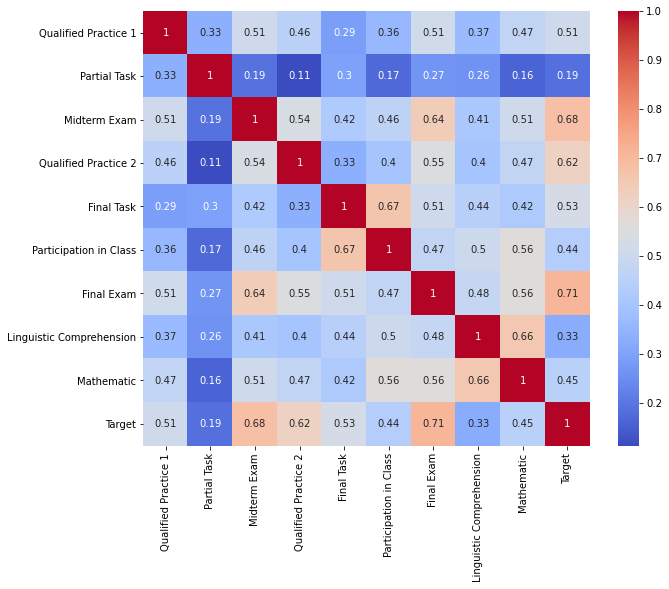

In [17]:
# correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Data Augmentation (GAN)

In [18]:
# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Target
0,2,1,1,9,19.0,17.0,12.0,13.0,19,12.0,19,17,1
1,2,1,0,15,20.0,20.0,20.0,20.0,18,14.0,20,19,1
2,2,1,1,6,0.0,0.0,5.0,6.0,14,6.0,11,10,0
3,2,1,1,20,20.0,20.0,20.0,20.0,20,18.0,20,19,1
4,2,1,1,6,16.0,15.0,7.0,17.0,18,7.0,16,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,1,2,1,19,18.0,14.0,17.0,19.0,17,12.0,16,16,1
663,1,2,1,11,18.0,9.0,15.0,19.0,17,13.0,14,13,1
664,1,2,1,18,18.0,20.0,12.0,15.0,16,10.0,17,15,1
665,1,2,1,18,19.0,12.0,17.0,16.0,17,12.0,17,14,1


In [20]:
# seperate 20% of data for testing
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic
532,2,1,1,15,19.0,17.0,10.0,16.0,17,17.0,16,20
333,1,2,1,16,18.0,9.0,4.0,20.0,17,15.0,16,16
556,2,1,0,14,20.0,10.0,18.0,20.0,20,15.0,19,20
662,1,2,1,19,18.0,14.0,17.0,19.0,17,12.0,16,16
457,1,2,1,10,15.0,16.0,16.0,20.0,20,9.0,18,17
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1,0,1,3,19.0,0.0,12.0,14.0,15,2.0,11,11
372,0,1,1,12,18.0,7.0,9.0,17.0,16,11.0,13,16
423,0,1,0,18,18.0,13.0,18.5,17.0,17,15.0,19,16
650,1,0,1,14,18.0,19.0,16.0,12.0,17,19.0,19,16


In [22]:
# scale data
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [23]:
def create_generator(input_dim, num_classes):
    input_noise = Input(shape=(input_dim,))
    input_label = Input(shape=(1,))
    x = Concatenate()([input_noise, input_label])

    model = Sequential()
    model.add(Dense(128, input_dim=input_dim + num_classes))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(X_train.shape[1:]), activation='tanh'))

    x = model(x)
    return Model([input_noise, input_label], x)

In [24]:
def create_discriminator():
    input_data = Input(shape=X_train.shape[1:])
    input_label = Input(shape=(1,))
    x = Concatenate()([input_data, input_label])

    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1] + 1))
    model.add(LeakyReLU(0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))

    x = model(x)
    return Model([input_data, input_label], x)

In [25]:
def train_gan(epochs, batch_size):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_samples = X_train.iloc[idx]
        real_labels = y.values[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        synthetic_labels = 1 - real_labels
        synthetic_samples = generator.predict([noise, synthetic_labels])

        d_loss_real = discriminator.train_on_batch([real_samples, real_labels], np.ones(half_batch))
        d_loss_synthetic = discriminator.train_on_batch([synthetic_samples, synthetic_labels], np.zeros(half_batch))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_synthetic)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        sampled_labels = np.random.randint(0, 2, batch_size)
        g_loss = combined.train_on_batch([noise, sampled_labels], np.ones(batch_size))

        print(f"Epoch {epoch}: [D loss: {d_loss}, acc: {0.5 * (d_loss_real[1] + d_loss_synthetic[1])}] [G loss: {g_loss}]")

In [26]:
generator = create_generator(100, 1)
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8), metrics=['accuracy'])

In [27]:
# Freeze the discriminator for generator training
discriminator.trainable = False
gan_input_noise = Input(shape=(100,))
gan_input_label = Input(shape=(1,))
x = generator([gan_input_noise, gan_input_label])
gan_output = discriminator([x, gan_input_label])
combined = Model([gan_input_noise, gan_input_label], gan_output)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8))

In [28]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic
532,2,1,1,15,19.0,17.0,10.0,16.0,17,17.0,16,20
333,1,2,1,16,18.0,9.0,4.0,20.0,17,15.0,16,16
556,2,1,0,14,20.0,10.0,18.0,20.0,20,15.0,19,20
662,1,2,1,19,18.0,14.0,17.0,19.0,17,12.0,16,16
457,1,2,1,10,15.0,16.0,16.0,20.0,20,9.0,18,17
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1,0,1,3,19.0,0.0,12.0,14.0,15,2.0,11,11
372,0,1,1,12,18.0,7.0,9.0,17.0,16,11.0,13,16
423,0,1,0,18,18.0,13.0,18.5,17.0,17,15.0,19,16
650,1,0,1,14,18.0,19.0,16.0,12.0,17,19.0,19,16


In [29]:
train_gan(epochs=10000, batch_size=32)

Epoch 0: [D loss: [1.98056355 0.0625    ], acc: 0.0625] [G loss: 0.6764122247695923]
Epoch 1: [D loss: [0.39932496 0.5625    ], acc: 0.5625] [G loss: 0.674545168876648]
Epoch 2: [D loss: [0.36611149 0.6875    ], acc: 0.6875] [G loss: 0.658091127872467]
Epoch 3: [D loss: [0.36395398 0.59375   ], acc: 0.59375] [G loss: 0.6621383428573608]
Epoch 4: [D loss: [0.35715994 0.71875   ], acc: 0.71875] [G loss: 0.6971193552017212]
Epoch 5: [D loss: [0.34610223 0.8125    ], acc: 0.8125] [G loss: 0.7082464098930359]
Epoch 6: [D loss: [0.35239534 0.8125    ], acc: 0.8125] [G loss: 0.7531769275665283]
Epoch 7: [D loss: [0.30291105 0.90625   ], acc: 0.90625] [G loss: 0.765597403049469]
Epoch 8: [D loss: [0.30966927 0.875     ], acc: 0.875] [G loss: 0.794109582901001]
Epoch 9: [D loss: [0.29263361 0.90625   ], acc: 0.90625] [G loss: 0.8739331364631653]
Epoch 10: [D loss: [0.312742 0.84375 ], acc: 0.84375] [G loss: 0.8753349781036377]
Epoch 11: [D loss: [0.31188488 0.8125    ], acc: 0.8125] [G loss: 0.

Epoch 98: [D loss: [0.02502495 1.        ], acc: 1.0] [G loss: 3.6305177211761475]
Epoch 99: [D loss: [0.01461303 1.        ], acc: 1.0] [G loss: 3.638594627380371]
Epoch 100: [D loss: [0.02093796 1.        ], acc: 1.0] [G loss: 4.3281989097595215]
Epoch 101: [D loss: [0.0205829 1.       ], acc: 1.0] [G loss: 4.090935707092285]
Epoch 102: [D loss: [0.01233841 1.        ], acc: 1.0] [G loss: 4.5879435539245605]
Epoch 103: [D loss: [0.01390561 1.        ], acc: 1.0] [G loss: 4.735805511474609]
Epoch 104: [D loss: [0.0074619 1.       ], acc: 1.0] [G loss: 4.56005859375]
Epoch 105: [D loss: [0.00912184 1.        ], acc: 1.0] [G loss: 4.967333793640137]
Epoch 106: [D loss: [0.00978463 1.        ], acc: 1.0] [G loss: 4.648795127868652]
Epoch 107: [D loss: [0.00759382 1.        ], acc: 1.0] [G loss: 5.019330024719238]
Epoch 108: [D loss: [0.00617415 1.        ], acc: 1.0] [G loss: 5.121744632720947]
Epoch 109: [D loss: [0.0048384 1.       ], acc: 1.0] [G loss: 5.577094078063965]
Epoch 110: [D

Epoch 197: [D loss: [0.0052398 1.       ], acc: 1.0] [G loss: 5.050935745239258]
Epoch 198: [D loss: [0.00474155 1.        ], acc: 1.0] [G loss: 5.064461708068848]
Epoch 199: [D loss: [0.00611089 1.        ], acc: 1.0] [G loss: 5.537668228149414]
Epoch 200: [D loss: [0.00696934 1.        ], acc: 1.0] [G loss: 5.551046371459961]
Epoch 201: [D loss: [0.00433026 1.        ], acc: 1.0] [G loss: 5.762436866760254]
Epoch 202: [D loss: [0.00335312 1.        ], acc: 1.0] [G loss: 5.7695112228393555]
Epoch 203: [D loss: [0.00330797 1.        ], acc: 1.0] [G loss: 6.201423645019531]
Epoch 204: [D loss: [0.00299064 1.        ], acc: 1.0] [G loss: 5.463077068328857]
Epoch 205: [D loss: [0.00280552 1.        ], acc: 1.0] [G loss: 5.832224369049072]
Epoch 206: [D loss: [0.00303834 1.        ], acc: 1.0] [G loss: 5.912755966186523]
Epoch 207: [D loss: [0.00662576 1.        ], acc: 1.0] [G loss: 5.799311637878418]
Epoch 208: [D loss: [0.00250243 1.        ], acc: 1.0] [G loss: 6.054523944854736]
Epoch

Epoch 294: [D loss: [7.25151287e-04 1.00000000e+00], acc: 1.0] [G loss: 7.342714309692383]
Epoch 295: [D loss: [8.13804453e-04 1.00000000e+00], acc: 1.0] [G loss: 7.888310432434082]
Epoch 296: [D loss: [5.7320212e-04 1.0000000e+00], acc: 1.0] [G loss: 7.532773971557617]
Epoch 297: [D loss: [5.78338567e-04 1.00000000e+00], acc: 1.0] [G loss: 7.712096214294434]
Epoch 298: [D loss: [8.10824878e-04 1.00000000e+00], acc: 1.0] [G loss: 7.920055389404297]
Epoch 299: [D loss: [6.07336038e-04 1.00000000e+00], acc: 1.0] [G loss: 7.597837448120117]
Epoch 300: [D loss: [4.50753992e-04 1.00000000e+00], acc: 1.0] [G loss: 7.381115436553955]
Epoch 301: [D loss: [6.74395189e-04 1.00000000e+00], acc: 1.0] [G loss: 7.136295795440674]
Epoch 302: [D loss: [6.59353533e-04 1.00000000e+00], acc: 1.0] [G loss: 7.036043167114258]
Epoch 303: [D loss: [6.73358453e-04 1.00000000e+00], acc: 1.0] [G loss: 7.381505966186523]
Epoch 304: [D loss: [4.36020136e-04 1.00000000e+00], acc: 1.0] [G loss: 7.558303356170654]
E

Epoch 385: [D loss: [3.89769191e-04 1.00000000e+00], acc: 1.0] [G loss: 7.970773220062256]
Epoch 386: [D loss: [5.57350199e-04 1.00000000e+00], acc: 1.0] [G loss: 7.559017181396484]
Epoch 387: [D loss: [3.24178267e-04 1.00000000e+00], acc: 1.0] [G loss: 7.816013813018799]
Epoch 388: [D loss: [3.82517905e-04 1.00000000e+00], acc: 1.0] [G loss: 7.677072525024414]
Epoch 389: [D loss: [4.55247248e-04 1.00000000e+00], acc: 1.0] [G loss: 8.335000991821289]
Epoch 390: [D loss: [4.12053707e-04 1.00000000e+00], acc: 1.0] [G loss: 8.429436683654785]
Epoch 391: [D loss: [2.73520128e-04 1.00000000e+00], acc: 1.0] [G loss: 8.415863037109375]
Epoch 392: [D loss: [3.68468305e-04 1.00000000e+00], acc: 1.0] [G loss: 7.955981254577637]
Epoch 393: [D loss: [3.68957795e-04 1.00000000e+00], acc: 1.0] [G loss: 8.135175704956055]
Epoch 394: [D loss: [4.31271532e-04 1.00000000e+00], acc: 1.0] [G loss: 8.451654434204102]
Epoch 395: [D loss: [3.65400279e-04 1.00000000e+00], acc: 1.0] [G loss: 7.817129135131836]

Epoch 476: [D loss: [2.40313286e-04 1.00000000e+00], acc: 1.0] [G loss: 8.737009048461914]
Epoch 477: [D loss: [2.14726478e-04 1.00000000e+00], acc: 1.0] [G loss: 8.272279739379883]
Epoch 478: [D loss: [2.40191466e-04 1.00000000e+00], acc: 1.0] [G loss: 8.766051292419434]
Epoch 479: [D loss: [2.14780204e-04 1.00000000e+00], acc: 1.0] [G loss: 8.77825927734375]
Epoch 480: [D loss: [1.97094729e-04 1.00000000e+00], acc: 1.0] [G loss: 9.214040756225586]
Epoch 481: [D loss: [1.93779529e-04 1.00000000e+00], acc: 1.0] [G loss: 8.452630996704102]
Epoch 482: [D loss: [2.07751488e-04 1.00000000e+00], acc: 1.0] [G loss: 8.885085105895996]
Epoch 483: [D loss: [1.84697125e-04 1.00000000e+00], acc: 1.0] [G loss: 8.954620361328125]
Epoch 484: [D loss: [2.45887458e-04 1.00000000e+00], acc: 1.0] [G loss: 8.557044982910156]
Epoch 485: [D loss: [2.62325492e-04 1.00000000e+00], acc: 1.0] [G loss: 8.81075668334961]
Epoch 486: [D loss: [2.50834207e-04 1.00000000e+00], acc: 1.0] [G loss: 8.482702255249023]
E

Epoch 567: [D loss: [2.05325644e-04 1.00000000e+00], acc: 1.0] [G loss: 9.322938919067383]
Epoch 568: [D loss: [1.84523746e-04 1.00000000e+00], acc: 1.0] [G loss: 9.162737846374512]
Epoch 569: [D loss: [1.58980097e-04 1.00000000e+00], acc: 1.0] [G loss: 8.576278686523438]
Epoch 570: [D loss: [1.61114715e-04 1.00000000e+00], acc: 1.0] [G loss: 9.505374908447266]
Epoch 571: [D loss: [1.85286251e-04 1.00000000e+00], acc: 1.0] [G loss: 9.26126480102539]
Epoch 572: [D loss: [1.4259037e-04 1.0000000e+00], acc: 1.0] [G loss: 9.084848403930664]
Epoch 573: [D loss: [1.45265171e-04 1.00000000e+00], acc: 1.0] [G loss: 9.443721771240234]
Epoch 574: [D loss: [1.45460258e-04 1.00000000e+00], acc: 1.0] [G loss: 8.94598388671875]
Epoch 575: [D loss: [3.24502689e-04 1.00000000e+00], acc: 1.0] [G loss: 8.768665313720703]
Epoch 576: [D loss: [2.04581134e-04 1.00000000e+00], acc: 1.0] [G loss: 8.8486909866333]
Epoch 577: [D loss: [1.29294426e-04 1.00000000e+00], acc: 1.0] [G loss: 8.839158058166504]
Epoch

Epoch 659: [D loss: [8.08769815e-05 1.00000000e+00], acc: 1.0] [G loss: 9.542585372924805]
Epoch 660: [D loss: [1.2196332e-04 1.0000000e+00], acc: 1.0] [G loss: 9.283487319946289]
Epoch 661: [D loss: [2.23301671e-04 1.00000000e+00], acc: 1.0] [G loss: 9.462377548217773]
Epoch 662: [D loss: [8.18384954e-05 1.00000000e+00], acc: 1.0] [G loss: 9.114731788635254]
Epoch 663: [D loss: [1.00372597e-04 1.00000000e+00], acc: 1.0] [G loss: 9.292555809020996]
Epoch 664: [D loss: [1.49983355e-04 1.00000000e+00], acc: 1.0] [G loss: 9.121912002563477]
Epoch 665: [D loss: [1.4306988e-04 1.0000000e+00], acc: 1.0] [G loss: 8.698776245117188]
Epoch 666: [D loss: [2.23476389e-04 1.00000000e+00], acc: 1.0] [G loss: 9.385839462280273]
Epoch 667: [D loss: [2.23245886e-04 1.00000000e+00], acc: 1.0] [G loss: 9.127693176269531]
Epoch 668: [D loss: [1.3300259e-04 1.0000000e+00], acc: 1.0] [G loss: 9.385066986083984]
Epoch 669: [D loss: [1.08655547e-04 1.00000000e+00], acc: 1.0] [G loss: 9.4767427444458]
Epoch 6

Epoch 750: [D loss: [7.15035824e-05 1.00000000e+00], acc: 1.0] [G loss: 9.49763011932373]
Epoch 751: [D loss: [7.24730814e-05 1.00000000e+00], acc: 1.0] [G loss: 9.593303680419922]
Epoch 752: [D loss: [9.53530141e-05 1.00000000e+00], acc: 1.0] [G loss: 9.246824264526367]
Epoch 753: [D loss: [8.49792918e-05 1.00000000e+00], acc: 1.0] [G loss: 9.767162322998047]
Epoch 754: [D loss: [5.58178807e-05 1.00000000e+00], acc: 1.0] [G loss: 9.435115814208984]
Epoch 755: [D loss: [7.83015868e-05 1.00000000e+00], acc: 1.0] [G loss: 9.615020751953125]
Epoch 756: [D loss: [1.22360743e-04 1.00000000e+00], acc: 1.0] [G loss: 9.530377388000488]
Epoch 757: [D loss: [7.76003593e-05 1.00000000e+00], acc: 1.0] [G loss: 9.528502464294434]
Epoch 758: [D loss: [2.07640194e-04 1.00000000e+00], acc: 1.0] [G loss: 9.778106689453125]
Epoch 759: [D loss: [8.73787235e-05 1.00000000e+00], acc: 1.0] [G loss: 9.436466217041016]
Epoch 760: [D loss: [9.46626459e-05 1.00000000e+00], acc: 1.0] [G loss: 9.522266387939453]


Epoch 840: [D loss: [5.08492084e-05 1.00000000e+00], acc: 1.0] [G loss: 9.915353775024414]
Epoch 841: [D loss: [6.14426348e-05 1.00000000e+00], acc: 1.0] [G loss: 9.826095581054688]
Epoch 842: [D loss: [9.60299949e-05 1.00000000e+00], acc: 1.0] [G loss: 10.0005464553833]
Epoch 843: [D loss: [3.28426435e-05 1.00000000e+00], acc: 1.0] [G loss: 9.83492660522461]
Epoch 844: [D loss: [7.52379327e-05 1.00000000e+00], acc: 1.0] [G loss: 10.10071086883545]
Epoch 845: [D loss: [7.32742123e-05 1.00000000e+00], acc: 1.0] [G loss: 9.74476432800293]
Epoch 846: [D loss: [4.94720293e-05 1.00000000e+00], acc: 1.0] [G loss: 9.592676162719727]
Epoch 847: [D loss: [6.76049185e-05 1.00000000e+00], acc: 1.0] [G loss: 9.8474760055542]
Epoch 848: [D loss: [5.5759624e-05 1.0000000e+00], acc: 1.0] [G loss: 10.026945114135742]
Epoch 849: [D loss: [4.99000147e-05 1.00000000e+00], acc: 1.0] [G loss: 10.035303115844727]
Epoch 850: [D loss: [5.5382836e-05 1.0000000e+00], acc: 1.0] [G loss: 10.300247192382812]
Epoch

Epoch 931: [D loss: [3.91099129e-05 1.00000000e+00], acc: 1.0] [G loss: 9.827324867248535]
Epoch 932: [D loss: [4.24085151e-05 1.00000000e+00], acc: 1.0] [G loss: 9.993915557861328]
Epoch 933: [D loss: [1.21838719e-04 1.00000000e+00], acc: 1.0] [G loss: 10.330425262451172]
Epoch 934: [D loss: [5.65395515e-05 1.00000000e+00], acc: 1.0] [G loss: 9.978504180908203]
Epoch 935: [D loss: [5.37916368e-05 1.00000000e+00], acc: 1.0] [G loss: 10.243473052978516]
Epoch 936: [D loss: [6.23094508e-05 1.00000000e+00], acc: 1.0] [G loss: 10.067473411560059]
Epoch 937: [D loss: [6.22681166e-05 1.00000000e+00], acc: 1.0] [G loss: 10.142623901367188]
Epoch 938: [D loss: [4.36465339e-05 1.00000000e+00], acc: 1.0] [G loss: 10.250396728515625]
Epoch 939: [D loss: [5.2407312e-05 1.0000000e+00], acc: 1.0] [G loss: 9.984739303588867]
Epoch 940: [D loss: [1.21751276e-04 1.00000000e+00], acc: 1.0] [G loss: 9.912418365478516]
Epoch 941: [D loss: [5.00134526e-05 1.00000000e+00], acc: 1.0] [G loss: 9.8217077255249

Epoch 1021: [D loss: [6.10899515e-05 1.00000000e+00], acc: 1.0] [G loss: 10.15517807006836]
Epoch 1022: [D loss: [4.31962338e-05 1.00000000e+00], acc: 1.0] [G loss: 10.157859802246094]
Epoch 1023: [D loss: [9.91657798e-05 1.00000000e+00], acc: 1.0] [G loss: 10.427139282226562]
Epoch 1024: [D loss: [3.00047218e-05 1.00000000e+00], acc: 1.0] [G loss: 10.243978500366211]
Epoch 1025: [D loss: [4.25637264e-05 1.00000000e+00], acc: 1.0] [G loss: 10.336868286132812]
Epoch 1026: [D loss: [5.5912411e-05 1.0000000e+00], acc: 1.0] [G loss: 10.163263320922852]
Epoch 1027: [D loss: [7.15727983e-05 1.00000000e+00], acc: 1.0] [G loss: 10.074567794799805]
Epoch 1028: [D loss: [3.79360135e-05 1.00000000e+00], acc: 1.0] [G loss: 9.99063491821289]
Epoch 1029: [D loss: [1.02693266e-04 1.00000000e+00], acc: 1.0] [G loss: 10.33730697631836]
Epoch 1030: [D loss: [5.10470137e-05 1.00000000e+00], acc: 1.0] [G loss: 10.334709167480469]
Epoch 1031: [D loss: [5.52084948e-05 1.00000000e+00], acc: 1.0] [G loss: 10.

Epoch 1110: [D loss: [3.83190938e-05 1.00000000e+00], acc: 1.0] [G loss: 10.794364929199219]
Epoch 1111: [D loss: [9.70279107e-05 1.00000000e+00], acc: 1.0] [G loss: 10.345098495483398]
Epoch 1112: [D loss: [5.05998469e-05 1.00000000e+00], acc: 1.0] [G loss: 10.611983299255371]
Epoch 1113: [D loss: [9.60614634e-05 1.00000000e+00], acc: 1.0] [G loss: 10.340085983276367]
Epoch 1114: [D loss: [3.51923974e-05 1.00000000e+00], acc: 1.0] [G loss: 10.425981521606445]
Epoch 1115: [D loss: [2.12590449e-05 1.00000000e+00], acc: 1.0] [G loss: 10.167181015014648]
Epoch 1116: [D loss: [6.02755972e-05 1.00000000e+00], acc: 1.0] [G loss: 10.164321899414062]
Epoch 1117: [D loss: [4.24008374e-05 1.00000000e+00], acc: 1.0] [G loss: 10.418127059936523]
Epoch 1118: [D loss: [4.09051368e-05 1.00000000e+00], acc: 1.0] [G loss: 9.9995698928833]
Epoch 1119: [D loss: [5.15005822e-05 1.00000000e+00], acc: 1.0] [G loss: 10.693249702453613]
Epoch 1120: [D loss: [3.84259982e-05 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 1199: [D loss: [4.06147146e-05 1.00000000e+00], acc: 1.0] [G loss: 10.765054702758789]
Epoch 1200: [D loss: [3.8614603e-05 1.0000000e+00], acc: 1.0] [G loss: 10.591903686523438]
Epoch 1201: [D loss: [3.27146062e-05 1.00000000e+00], acc: 1.0] [G loss: 10.507877349853516]
Epoch 1202: [D loss: [3.51556375e-05 1.00000000e+00], acc: 1.0] [G loss: 10.521479606628418]
Epoch 1203: [D loss: [3.82124105e-05 1.00000000e+00], acc: 1.0] [G loss: 11.134199142456055]
Epoch 1204: [D loss: [2.08327317e-05 1.00000000e+00], acc: 1.0] [G loss: 10.697742462158203]
Epoch 1205: [D loss: [3.79307597e-05 1.00000000e+00], acc: 1.0] [G loss: 10.526970863342285]
Epoch 1206: [D loss: [3.01852909e-05 1.00000000e+00], acc: 1.0] [G loss: 10.705345153808594]
Epoch 1207: [D loss: [3.44687812e-05 1.00000000e+00], acc: 1.0] [G loss: 10.368669509887695]
Epoch 1208: [D loss: [2.31455853e-05 1.00000000e+00], acc: 1.0] [G loss: 11.064785957336426]
Epoch 1209: [D loss: [2.56035665e-05 1.00000000e+00], acc: 1.0] [G loss:

Epoch 1288: [D loss: [5.47593172e-05 1.00000000e+00], acc: 1.0] [G loss: 10.65550708770752]
Epoch 1289: [D loss: [3.41442108e-05 1.00000000e+00], acc: 1.0] [G loss: 10.65597152709961]
Epoch 1290: [D loss: [2.91543531e-05 1.00000000e+00], acc: 1.0] [G loss: 10.307573318481445]
Epoch 1291: [D loss: [1.80000733e-05 1.00000000e+00], acc: 1.0] [G loss: 10.22361946105957]
Epoch 1292: [D loss: [2.13779217e-05 1.00000000e+00], acc: 1.0] [G loss: 10.582064628601074]
Epoch 1293: [D loss: [2.68325982e-05 1.00000000e+00], acc: 1.0] [G loss: 11.01491928100586]
Epoch 1294: [D loss: [3.00261836e-05 1.00000000e+00], acc: 1.0] [G loss: 11.302526473999023]
Epoch 1295: [D loss: [3.12906561e-05 1.00000000e+00], acc: 1.0] [G loss: 10.933697700500488]
Epoch 1296: [D loss: [3.77376625e-05 1.00000000e+00], acc: 1.0] [G loss: 10.581417083740234]
Epoch 1297: [D loss: [3.15269217e-05 1.00000000e+00], acc: 1.0] [G loss: 11.042638778686523]
Epoch 1298: [D loss: [2.10371626e-05 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 1377: [D loss: [2.3635232e-05 1.0000000e+00], acc: 1.0] [G loss: 11.368003845214844]
Epoch 1378: [D loss: [1.96848306e-05 1.00000000e+00], acc: 1.0] [G loss: 10.698701858520508]
Epoch 1379: [D loss: [2.71124996e-05 1.00000000e+00], acc: 1.0] [G loss: 11.023197174072266]
Epoch 1380: [D loss: [3.11959293e-05 1.00000000e+00], acc: 1.0] [G loss: 10.776259422302246]
Epoch 1381: [D loss: [1.92265044e-05 1.00000000e+00], acc: 1.0] [G loss: 11.022805213928223]
Epoch 1382: [D loss: [2.10432151e-05 1.00000000e+00], acc: 1.0] [G loss: 11.291784286499023]
Epoch 1383: [D loss: [1.3467036e-05 1.0000000e+00], acc: 1.0] [G loss: 11.39050579071045]
Epoch 1384: [D loss: [4.12050013e-05 1.00000000e+00], acc: 1.0] [G loss: 10.949995040893555]
Epoch 1385: [D loss: [6.57728233e-05 1.00000000e+00], acc: 1.0] [G loss: 11.29060173034668]
Epoch 1386: [D loss: [1.94558722e-05 1.00000000e+00], acc: 1.0] [G loss: 11.371589660644531]
Epoch 1387: [D loss: [2.46601949e-05 1.00000000e+00], acc: 1.0] [G loss: 11.

Epoch 1465: [D loss: [2.65161254e-05 1.00000000e+00], acc: 1.0] [G loss: 11.203981399536133]
Epoch 1466: [D loss: [3.2066072e-05 1.0000000e+00], acc: 1.0] [G loss: 10.867169380187988]
Epoch 1467: [D loss: [2.02697072e-05 1.00000000e+00], acc: 1.0] [G loss: 11.218441009521484]
Epoch 1468: [D loss: [1.86268122e-05 1.00000000e+00], acc: 1.0] [G loss: 10.873672485351562]
Epoch 1469: [D loss: [5.41884219e-05 1.00000000e+00], acc: 1.0] [G loss: 11.28714370727539]
Epoch 1470: [D loss: [3.49838128e-05 1.00000000e+00], acc: 1.0] [G loss: 11.46387767791748]
Epoch 1471: [D loss: [1.36921475e-05 1.00000000e+00], acc: 1.0] [G loss: 11.026386260986328]
Epoch 1472: [D loss: [1.41421738e-05 1.00000000e+00], acc: 1.0] [G loss: 11.102338790893555]
Epoch 1473: [D loss: [1.8785185e-05 1.0000000e+00], acc: 1.0] [G loss: 11.109386444091797]
Epoch 1474: [D loss: [1.99826325e-05 1.00000000e+00], acc: 1.0] [G loss: 11.37189769744873]
Epoch 1475: [D loss: [2.22070169e-05 1.00000000e+00], acc: 1.0] [G loss: 10.8

Epoch 1554: [D loss: [1.56928218e-05 1.00000000e+00], acc: 1.0] [G loss: 11.245296478271484]
Epoch 1555: [D loss: [1.55719596e-05 1.00000000e+00], acc: 1.0] [G loss: 11.00016975402832]
Epoch 1556: [D loss: [1.34527592e-05 1.00000000e+00], acc: 1.0] [G loss: 11.496720314025879]
Epoch 1557: [D loss: [1.27883774e-05 1.00000000e+00], acc: 1.0] [G loss: 11.409760475158691]
Epoch 1558: [D loss: [9.97591919e-06 1.00000000e+00], acc: 1.0] [G loss: 11.331352233886719]
Epoch 1559: [D loss: [1.47199985e-05 1.00000000e+00], acc: 1.0] [G loss: 11.24828052520752]
Epoch 1560: [D loss: [1.55616567e-05 1.00000000e+00], acc: 1.0] [G loss: 11.261554718017578]
Epoch 1561: [D loss: [1.57396447e-05 1.00000000e+00], acc: 1.0] [G loss: 11.341245651245117]
Epoch 1562: [D loss: [1.39212214e-05 1.00000000e+00], acc: 1.0] [G loss: 10.872701644897461]
Epoch 1563: [D loss: [1.85346601e-05 1.00000000e+00], acc: 1.0] [G loss: 11.509805679321289]
Epoch 1564: [D loss: [2.87801886e-05 1.00000000e+00], acc: 1.0] [G loss:

Epoch 1643: [D loss: [1.8256016e-05 1.0000000e+00], acc: 1.0] [G loss: 11.0369291305542]
Epoch 1644: [D loss: [1.4908808e-05 1.0000000e+00], acc: 1.0] [G loss: 11.040206909179688]
Epoch 1645: [D loss: [1.66009575e-05 1.00000000e+00], acc: 1.0] [G loss: 11.31440544128418]
Epoch 1646: [D loss: [1.6230633e-05 1.0000000e+00], acc: 1.0] [G loss: 11.225356101989746]
Epoch 1647: [D loss: [1.61170105e-05 1.00000000e+00], acc: 1.0] [G loss: 11.77106761932373]
Epoch 1648: [D loss: [1.61070264e-05 1.00000000e+00], acc: 1.0] [G loss: 11.233182907104492]
Epoch 1649: [D loss: [1.74845157e-05 1.00000000e+00], acc: 1.0] [G loss: 11.411588668823242]
Epoch 1650: [D loss: [1.29996975e-05 1.00000000e+00], acc: 1.0] [G loss: 11.15488338470459]
Epoch 1651: [D loss: [1.73427283e-05 1.00000000e+00], acc: 1.0] [G loss: 11.246088027954102]
Epoch 1652: [D loss: [2.40364852e-05 1.00000000e+00], acc: 1.0] [G loss: 11.249755859375]
Epoch 1653: [D loss: [2.11130878e-05 1.00000000e+00], acc: 1.0] [G loss: 11.51519203

Epoch 1732: [D loss: [1.40592891e-05 1.00000000e+00], acc: 1.0] [G loss: 11.630414962768555]
Epoch 1733: [D loss: [1.78659143e-05 1.00000000e+00], acc: 1.0] [G loss: 11.369462966918945]
Epoch 1734: [D loss: [8.058905e-06 1.000000e+00], acc: 1.0] [G loss: 10.783950805664062]
Epoch 1735: [D loss: [6.92795031e-06 1.00000000e+00], acc: 1.0] [G loss: 11.292089462280273]
Epoch 1736: [D loss: [1.37105237e-05 1.00000000e+00], acc: 1.0] [G loss: 11.639315605163574]
Epoch 1737: [D loss: [1.58520606e-05 1.00000000e+00], acc: 1.0] [G loss: 10.86791706085205]
Epoch 1738: [D loss: [1.0669469e-05 1.0000000e+00], acc: 1.0] [G loss: 11.38400650024414]
Epoch 1739: [D loss: [1.15976091e-05 1.00000000e+00], acc: 1.0] [G loss: 11.387896537780762]
Epoch 1740: [D loss: [1.01465786e-05 1.00000000e+00], acc: 1.0] [G loss: 11.567133903503418]
Epoch 1741: [D loss: [1.86439433e-05 1.00000000e+00], acc: 1.0] [G loss: 11.390804290771484]
Epoch 1742: [D loss: [1.85185809e-05 1.00000000e+00], acc: 1.0] [G loss: 11.48

Epoch 1821: [D loss: [8.34628395e-06 1.00000000e+00], acc: 1.0] [G loss: 11.40971565246582]
Epoch 1822: [D loss: [7.70500759e-06 1.00000000e+00], acc: 1.0] [G loss: 11.322319030761719]
Epoch 1823: [D loss: [9.34797044e-06 1.00000000e+00], acc: 1.0] [G loss: 11.856491088867188]
Epoch 1824: [D loss: [8.25754116e-06 1.00000000e+00], acc: 1.0] [G loss: 11.95407772064209]
Epoch 1825: [D loss: [9.55163264e-06 1.00000000e+00], acc: 1.0] [G loss: 12.051382064819336]
Epoch 1826: [D loss: [1.2308741e-05 1.0000000e+00], acc: 1.0] [G loss: 12.14393138885498]
Epoch 1827: [D loss: [1.68111314e-05 1.00000000e+00], acc: 1.0] [G loss: 11.683948516845703]
Epoch 1828: [D loss: [1.02688799e-05 1.00000000e+00], acc: 1.0] [G loss: 11.771533966064453]
Epoch 1829: [D loss: [9.19620182e-06 1.00000000e+00], acc: 1.0] [G loss: 11.259390830993652]
Epoch 1830: [D loss: [1.13178425e-05 1.00000000e+00], acc: 1.0] [G loss: 11.180273056030273]
Epoch 1831: [D loss: [1.31414883e-05 1.00000000e+00], acc: 1.0] [G loss: 11

Epoch 1910: [D loss: [7.25591593e-06 1.00000000e+00], acc: 1.0] [G loss: 12.228209495544434]
Epoch 1911: [D loss: [1.66306299e-05 1.00000000e+00], acc: 1.0] [G loss: 11.958915710449219]
Epoch 1912: [D loss: [9.98248258e-06 1.00000000e+00], acc: 1.0] [G loss: 11.963096618652344]
Epoch 1913: [D loss: [8.16468097e-06 1.00000000e+00], acc: 1.0] [G loss: 11.698684692382812]
Epoch 1914: [D loss: [1.04644382e-05 1.00000000e+00], acc: 1.0] [G loss: 11.873870849609375]
Epoch 1915: [D loss: [1.17810965e-05 1.00000000e+00], acc: 1.0] [G loss: 11.285565376281738]
Epoch 1916: [D loss: [9.93321195e-06 1.00000000e+00], acc: 1.0] [G loss: 11.876628875732422]
Epoch 1917: [D loss: [7.21987703e-06 1.00000000e+00], acc: 1.0] [G loss: 11.877340316772461]
Epoch 1918: [D loss: [9.01152436e-06 1.00000000e+00], acc: 1.0] [G loss: 11.698772430419922]
Epoch 1919: [D loss: [9.97472607e-06 1.00000000e+00], acc: 1.0] [G loss: 11.542707443237305]
Epoch 1920: [D loss: [1.27872826e-05 1.00000000e+00], acc: 1.0] [G los

Epoch 1999: [D loss: [4.74934208e-06 1.00000000e+00], acc: 1.0] [G loss: 11.94703197479248]
Epoch 2000: [D loss: [8.45960426e-06 1.00000000e+00], acc: 1.0] [G loss: 12.480384826660156]
Epoch 2001: [D loss: [8.46694939e-06 1.00000000e+00], acc: 1.0] [G loss: 11.535462379455566]
Epoch 2002: [D loss: [8.40932481e-06 1.00000000e+00], acc: 1.0] [G loss: 11.700593948364258]
Epoch 2003: [D loss: [8.36515688e-06 1.00000000e+00], acc: 1.0] [G loss: 12.040176391601562]
Epoch 2004: [D loss: [1.09969374e-05 1.00000000e+00], acc: 1.0] [G loss: 12.399944305419922]
Epoch 2005: [D loss: [8.37076297e-06 1.00000000e+00], acc: 1.0] [G loss: 11.704303741455078]
Epoch 2006: [D loss: [7.26178212e-06 1.00000000e+00], acc: 1.0] [G loss: 12.050918579101562]
Epoch 2007: [D loss: [8.98069334e-06 1.00000000e+00], acc: 1.0] [G loss: 11.875341415405273]
Epoch 2008: [D loss: [9.71805552e-06 1.00000000e+00], acc: 1.0] [G loss: 12.226595878601074]
Epoch 2009: [D loss: [9.72912203e-06 1.00000000e+00], acc: 1.0] [G loss

Epoch 2087: [D loss: [5.84459771e-06 1.00000000e+00], acc: 1.0] [G loss: 12.440546035766602]
Epoch 2088: [D loss: [4.54847074e-06 1.00000000e+00], acc: 1.0] [G loss: 12.176793098449707]
Epoch 2089: [D loss: [7.63935591e-06 1.00000000e+00], acc: 1.0] [G loss: 12.013622283935547]
Epoch 2090: [D loss: [5.81288535e-06 1.00000000e+00], acc: 1.0] [G loss: 12.01302719116211]
Epoch 2091: [D loss: [7.03650864e-06 1.00000000e+00], acc: 1.0] [G loss: 11.76552963256836]
Epoch 2092: [D loss: [7.13629085e-06 1.00000000e+00], acc: 1.0] [G loss: 12.186473846435547]
Epoch 2093: [D loss: [7.00432318e-06 1.00000000e+00], acc: 1.0] [G loss: 12.367772102355957]
Epoch 2094: [D loss: [7.74091204e-06 1.00000000e+00], acc: 1.0] [G loss: 11.855183601379395]
Epoch 2095: [D loss: [6.97835536e-06 1.00000000e+00], acc: 1.0] [G loss: 12.108071327209473]
Epoch 2096: [D loss: [7.55703104e-06 1.00000000e+00], acc: 1.0] [G loss: 11.859882354736328]
Epoch 2097: [D loss: [7.16427257e-06 1.00000000e+00], acc: 1.0] [G loss:

Epoch 2176: [D loss: [6.31935715e-06 1.00000000e+00], acc: 1.0] [G loss: 12.112541198730469]
Epoch 2177: [D loss: [9.60034799e-06 1.00000000e+00], acc: 1.0] [G loss: 12.11090087890625]
Epoch 2178: [D loss: [6.65809722e-06 1.00000000e+00], acc: 1.0] [G loss: 12.53550910949707]
Epoch 2179: [D loss: [5.17754054e-06 1.00000000e+00], acc: 1.0] [G loss: 12.54471206665039]
Epoch 2180: [D loss: [1.1729056e-05 1.0000000e+00], acc: 1.0] [G loss: 12.360983848571777]
Epoch 2181: [D loss: [7.49179759e-06 1.00000000e+00], acc: 1.0] [G loss: 12.448155403137207]
Epoch 2182: [D loss: [6.32342415e-06 1.00000000e+00], acc: 1.0] [G loss: 12.623268127441406]
Epoch 2183: [D loss: [7.51720849e-06 1.00000000e+00], acc: 1.0] [G loss: 12.033750534057617]
Epoch 2184: [D loss: [5.17472176e-06 1.00000000e+00], acc: 1.0] [G loss: 12.119099617004395]
Epoch 2185: [D loss: [1.0406322e-05 1.0000000e+00], acc: 1.0] [G loss: 12.282539367675781]
Epoch 2186: [D loss: [6.7927126e-06 1.0000000e+00], acc: 1.0] [G loss: 12.286

Epoch 2265: [D loss: [2.30421488e-05 1.00000000e+00], acc: 1.0] [G loss: 12.420528411865234]
Epoch 2266: [D loss: [1.19412534e-05 1.00000000e+00], acc: 1.0] [G loss: 12.778448104858398]
Epoch 2267: [D loss: [5.55923865e-06 1.00000000e+00], acc: 1.0] [G loss: 12.326387405395508]
Epoch 2268: [D loss: [1.11764548e-05 1.00000000e+00], acc: 1.0] [G loss: 12.416704177856445]
Epoch 2269: [D loss: [6.2789306e-06 1.0000000e+00], acc: 1.0] [G loss: 12.30964183807373]
Epoch 2270: [D loss: [5.49466606e-06 1.00000000e+00], acc: 1.0] [G loss: 12.316719055175781]
Epoch 2271: [D loss: [4.8516445e-06 1.0000000e+00], acc: 1.0] [G loss: 12.31696605682373]
Epoch 2272: [D loss: [8.15540534e-06 1.00000000e+00], acc: 1.0] [G loss: 12.223716735839844]
Epoch 2273: [D loss: [7.5275794e-06 1.0000000e+00], acc: 1.0] [G loss: 12.31665325164795]
Epoch 2274: [D loss: [6.67576768e-06 1.00000000e+00], acc: 1.0] [G loss: 12.045283317565918]
Epoch 2275: [D loss: [8.58204839e-06 1.00000000e+00], acc: 1.0] [G loss: 12.503

Epoch 2354: [D loss: [7.99122381e-06 1.00000000e+00], acc: 1.0] [G loss: 12.951543807983398]
Epoch 2355: [D loss: [4.78303359e-06 1.00000000e+00], acc: 1.0] [G loss: 12.277997970581055]
Epoch 2356: [D loss: [6.82934848e-06 1.00000000e+00], acc: 1.0] [G loss: 12.025544166564941]
Epoch 2357: [D loss: [6.26247163e-06 1.00000000e+00], acc: 1.0] [G loss: 12.845224380493164]
Epoch 2358: [D loss: [4.69310095e-06 1.00000000e+00], acc: 1.0] [G loss: 12.194433212280273]
Epoch 2359: [D loss: [7.2701284e-06 1.0000000e+00], acc: 1.0] [G loss: 11.947572708129883]
Epoch 2360: [D loss: [3.83171073e-06 1.00000000e+00], acc: 1.0] [G loss: 12.483997344970703]
Epoch 2361: [D loss: [3.61529247e-06 1.00000000e+00], acc: 1.0] [G loss: 12.661575317382812]
Epoch 2362: [D loss: [4.12345152e-06 1.00000000e+00], acc: 1.0] [G loss: 12.042646408081055]
Epoch 2363: [D loss: [5.61593793e-06 1.00000000e+00], acc: 1.0] [G loss: 12.209383964538574]
Epoch 2364: [D loss: [5.21432335e-06 1.00000000e+00], acc: 1.0] [G loss:

Epoch 2443: [D loss: [6.70738427e-06 1.00000000e+00], acc: 1.0] [G loss: 12.724823951721191]
Epoch 2444: [D loss: [3.43923753e-06 1.00000000e+00], acc: 1.0] [G loss: 12.37601375579834]
Epoch 2445: [D loss: [4.25682526e-06 1.00000000e+00], acc: 1.0] [G loss: 12.547162055969238]
Epoch 2446: [D loss: [5.68527694e-06 1.00000000e+00], acc: 1.0] [G loss: 13.015860557556152]
Epoch 2447: [D loss: [5.65531448e-06 1.00000000e+00], acc: 1.0] [G loss: 12.92529296875]
Epoch 2448: [D loss: [6.490822e-06 1.000000e+00], acc: 1.0] [G loss: 12.925291061401367]
Epoch 2449: [D loss: [5.16882938e-06 1.00000000e+00], acc: 1.0] [G loss: 12.313837051391602]
Epoch 2450: [D loss: [5.62319713e-06 1.00000000e+00], acc: 1.0] [G loss: 12.31482982635498]
Epoch 2451: [D loss: [3.42572308e-06 1.00000000e+00], acc: 1.0] [G loss: 12.228343963623047]
Epoch 2452: [D loss: [4.27666314e-06 1.00000000e+00], acc: 1.0] [G loss: 12.563789367675781]
Epoch 2453: [D loss: [5.08310548e-06 1.00000000e+00], acc: 1.0] [G loss: 12.1370

Epoch 2532: [D loss: [3.7505186e-06 1.0000000e+00], acc: 1.0] [G loss: 12.671062469482422]
Epoch 2533: [D loss: [3.79174191e-06 1.00000000e+00], acc: 1.0] [G loss: 12.674772262573242]
Epoch 2534: [D loss: [3.35115451e-06 1.00000000e+00], acc: 1.0] [G loss: 12.418473243713379]
Epoch 2535: [D loss: [4.15625787e-06 1.00000000e+00], acc: 1.0] [G loss: 12.677726745605469]
Epoch 2536: [D loss: [3.6846495e-06 1.0000000e+00], acc: 1.0] [G loss: 12.679104804992676]
Epoch 2537: [D loss: [3.34424486e-06 1.00000000e+00], acc: 1.0] [G loss: 12.33769416809082]
Epoch 2538: [D loss: [9.6907479e-06 1.0000000e+00], acc: 1.0] [G loss: 12.68073844909668]
Epoch 2539: [D loss: [5.97387026e-06 1.00000000e+00], acc: 1.0] [G loss: 13.05027961730957]
Epoch 2540: [D loss: [4.02011815e-06 1.00000000e+00], acc: 1.0] [G loss: 12.593704223632812]
Epoch 2541: [D loss: [2.24202875e-06 1.00000000e+00], acc: 1.0] [G loss: 12.428712844848633]
Epoch 2542: [D loss: [4.79870189e-06 1.00000000e+00], acc: 1.0] [G loss: 12.958

Epoch 2622: [D loss: [4.17852121e-06 1.00000000e+00], acc: 1.0] [G loss: 12.745077133178711]
Epoch 2623: [D loss: [6.1083274e-06 1.0000000e+00], acc: 1.0] [G loss: 12.396392822265625]
Epoch 2624: [D loss: [3.25179035e-06 1.00000000e+00], acc: 1.0] [G loss: 12.748361587524414]
Epoch 2625: [D loss: [2.89356503e-06 1.00000000e+00], acc: 1.0] [G loss: 12.571002960205078]
Epoch 2626: [D loss: [8.06162757e-06 1.00000000e+00], acc: 1.0] [G loss: 12.935455322265625]
Epoch 2627: [D loss: [2.90182471e-06 1.00000000e+00], acc: 1.0] [G loss: 12.9349365234375]
Epoch 2628: [D loss: [3.7221271e-06 1.0000000e+00], acc: 1.0] [G loss: 12.936752319335938]
Epoch 2629: [D loss: [2.88299159e-06 1.00000000e+00], acc: 1.0] [G loss: 12.578390121459961]
Epoch 2630: [D loss: [8.37736025e-06 1.00000000e+00], acc: 1.0] [G loss: 12.402005195617676]
Epoch 2631: [D loss: [7.15976216e-06 1.00000000e+00], acc: 1.0] [G loss: 12.485032081604004]
Epoch 2632: [D loss: [3.59913605e-06 1.00000000e+00], acc: 1.0] [G loss: 12.

Epoch 2712: [D loss: [7.36064089e-06 1.00000000e+00], acc: 1.0] [G loss: 12.879037857055664]
Epoch 2713: [D loss: [3.48693425e-06 1.00000000e+00], acc: 1.0] [G loss: 12.969970703125]
Epoch 2714: [D loss: [4.12083226e-06 1.00000000e+00], acc: 1.0] [G loss: 12.971772193908691]
Epoch 2715: [D loss: [3.48594499e-06 1.00000000e+00], acc: 1.0] [G loss: 12.795295715332031]
Epoch 2716: [D loss: [3.48301732e-06 1.00000000e+00], acc: 1.0] [G loss: 13.159469604492188]
Epoch 2717: [D loss: [3.16242645e-06 1.00000000e+00], acc: 1.0] [G loss: 13.348091125488281]
Epoch 2718: [D loss: [2.52303596e-06 1.00000000e+00], acc: 1.0] [G loss: 12.540409088134766]
Epoch 2719: [D loss: [3.47185718e-06 1.00000000e+00], acc: 1.0] [G loss: 12.985309600830078]
Epoch 2720: [D loss: [6.08405776e-06 1.00000000e+00], acc: 1.0] [G loss: 12.987833976745605]
Epoch 2721: [D loss: [4.07227714e-06 1.00000000e+00], acc: 1.0] [G loss: 13.079960823059082]
Epoch 2722: [D loss: [4.0655532e-06 1.0000000e+00], acc: 1.0] [G loss: 13

Epoch 2801: [D loss: [2.94697525e-06 1.00000000e+00], acc: 1.0] [G loss: 13.232460021972656]
Epoch 2802: [D loss: [3.28487954e-06 1.00000000e+00], acc: 1.0] [G loss: 12.959712028503418]
Epoch 2803: [D loss: [2.11856629e-06 1.00000000e+00], acc: 1.0] [G loss: 13.142251968383789]
Epoch 2804: [D loss: [6.71941416e-06 1.00000000e+00], acc: 1.0] [G loss: 12.785755157470703]
Epoch 2805: [D loss: [2.91192132e-06 1.00000000e+00], acc: 1.0] [G loss: 12.785284042358398]
Epoch 2806: [D loss: [1.59686782e-06 1.00000000e+00], acc: 1.0] [G loss: 12.874725341796875]
Epoch 2807: [D loss: [2.69239648e-06 1.00000000e+00], acc: 1.0] [G loss: 12.962374687194824]
Epoch 2808: [D loss: [2.41922621e-06 1.00000000e+00], acc: 1.0] [G loss: 12.790245056152344]
Epoch 2809: [D loss: [4.29356498e-06 1.00000000e+00], acc: 1.0] [G loss: 13.056447982788086]
Epoch 2810: [D loss: [3.47248113e-06 1.00000000e+00], acc: 1.0] [G loss: 13.243094444274902]
Epoch 2811: [D loss: [3.18370572e-06 1.00000000e+00], acc: 1.0] [G los

Epoch 2890: [D loss: [2.64414743e-06 1.00000000e+00], acc: 1.0] [G loss: 13.504758834838867]
Epoch 2891: [D loss: [5.62711648e-06 1.00000000e+00], acc: 1.0] [G loss: 13.503683090209961]
Epoch 2892: [D loss: [2.68024737e-06 1.00000000e+00], acc: 1.0] [G loss: 13.150964736938477]
Epoch 2893: [D loss: [2.38101492e-06 1.00000000e+00], acc: 1.0] [G loss: 13.150491714477539]
Epoch 2894: [D loss: [2.39157334e-06 1.00000000e+00], acc: 1.0] [G loss: 13.237640380859375]
Epoch 2895: [D loss: [3.55936277e-06 1.00000000e+00], acc: 1.0] [G loss: 13.149419784545898]
Epoch 2896: [D loss: [2.84965486e-06 1.00000000e+00], acc: 1.0] [G loss: 12.895851135253906]
Epoch 2897: [D loss: [1.64967925e-06 1.00000000e+00], acc: 1.0] [G loss: 13.240257263183594]
Epoch 2898: [D loss: [3.37793915e-06 1.00000000e+00], acc: 1.0] [G loss: 13.24021053314209]
Epoch 2899: [D loss: [2.8591606e-06 1.0000000e+00], acc: 1.0] [G loss: 12.975561141967773]
Epoch 2900: [D loss: [2.64447066e-06 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 2979: [D loss: [2.44479923e-06 1.00000000e+00], acc: 1.0] [G loss: 12.750015258789062]
Epoch 2980: [D loss: [2.39519215e-06 1.00000000e+00], acc: 1.0] [G loss: 13.022859573364258]
Epoch 2981: [D loss: [2.41968931e-06 1.00000000e+00], acc: 1.0] [G loss: 12.931509017944336]
Epoch 2982: [D loss: [1.89689945e-06 1.00000000e+00], acc: 1.0] [G loss: 12.935150146484375]
Epoch 2983: [D loss: [2.40473284e-06 1.00000000e+00], acc: 1.0] [G loss: 13.633007049560547]
Epoch 2984: [D loss: [4.93938228e-06 1.00000000e+00], acc: 1.0] [G loss: 13.231121063232422]
Epoch 2985: [D loss: [2.62224399e-06 1.00000000e+00], acc: 1.0] [G loss: 13.223974227905273]
Epoch 2986: [D loss: [2.62260893e-06 1.00000000e+00], acc: 1.0] [G loss: 12.949365615844727]
Epoch 2987: [D loss: [3.115074e-06 1.000000e+00], acc: 1.0] [G loss: 13.322925567626953]
Epoch 2988: [D loss: [3.4832147e-06 1.0000000e+00], acc: 1.0] [G loss: 13.22950553894043]
Epoch 2989: [D loss: [2.18753521e-06 1.00000000e+00], acc: 1.0] [G loss: 13.1

Epoch 3068: [D loss: [3.69689747e-06 1.00000000e+00], acc: 1.0] [G loss: 13.84443473815918]
Epoch 3069: [D loss: [2.34377663e-06 1.00000000e+00], acc: 1.0] [G loss: 13.645044326782227]
Epoch 3070: [D loss: [2.79240445e-06 1.00000000e+00], acc: 1.0] [G loss: 13.361108779907227]
Epoch 3071: [D loss: [2.14813322e-06 1.00000000e+00], acc: 1.0] [G loss: 13.452234268188477]
Epoch 3072: [D loss: [2.35106154e-06 1.00000000e+00], acc: 1.0] [G loss: 13.178030014038086]
Epoch 3073: [D loss: [3.70570865e-06 1.00000000e+00], acc: 1.0] [G loss: 13.270782470703125]
Epoch 3074: [D loss: [2.33238023e-06 1.00000000e+00], acc: 1.0] [G loss: 13.555668830871582]
Epoch 3075: [D loss: [1.46927049e-06 1.00000000e+00], acc: 1.0] [G loss: 13.366525650024414]
Epoch 3076: [D loss: [3.24357698e-06 1.00000000e+00], acc: 1.0] [G loss: 13.559940338134766]
Epoch 3077: [D loss: [1.88054405e-06 1.00000000e+00], acc: 1.0] [G loss: 13.562719345092773]
Epoch 3078: [D loss: [2.30534761e-06 1.00000000e+00], acc: 1.0] [G loss

Epoch 3157: [D loss: [1.0396586e-06 1.0000000e+00], acc: 1.0] [G loss: 13.173392295837402]
Epoch 3158: [D loss: [1.7428346e-06 1.0000000e+00], acc: 1.0] [G loss: 13.254755020141602]
Epoch 3159: [D loss: [1.74048002e-06 1.00000000e+00], acc: 1.0] [G loss: 13.722185134887695]
Epoch 3160: [D loss: [1.90073805e-06 1.00000000e+00], acc: 1.0] [G loss: 13.726112365722656]
Epoch 3161: [D loss: [2.0893365e-06 1.0000000e+00], acc: 1.0] [G loss: 13.626848220825195]
Epoch 3162: [D loss: [2.17019678e-06 1.00000000e+00], acc: 1.0] [G loss: 12.935372352600098]
Epoch 3163: [D loss: [4.06434822e-06 1.00000000e+00], acc: 1.0] [G loss: 13.443522453308105]
Epoch 3164: [D loss: [2.23972848e-06 1.00000000e+00], acc: 1.0] [G loss: 13.629266738891602]
Epoch 3165: [D loss: [1.89038629e-06 1.00000000e+00], acc: 1.0] [G loss: 13.72896957397461]
Epoch 3166: [D loss: [1.5363093e-06 1.0000000e+00], acc: 1.0] [G loss: 13.443754196166992]
Epoch 3167: [D loss: [4.40880115e-06 1.00000000e+00], acc: 1.0] [G loss: 13.354

Epoch 3246: [D loss: [1.71034683e-06 1.00000000e+00], acc: 1.0] [G loss: 13.5148344039917]
Epoch 3247: [D loss: [1.13573624e-06 1.00000000e+00], acc: 1.0] [G loss: 13.963800430297852]
Epoch 3248: [D loss: [1.46714532e-06 1.00000000e+00], acc: 1.0] [G loss: 13.36571216583252]
Epoch 3249: [D loss: [1.41190661e-06 1.00000000e+00], acc: 1.0] [G loss: 13.96302604675293]
Epoch 3250: [D loss: [1.83000968e-06 1.00000000e+00], acc: 1.0] [G loss: 13.694456100463867]
Epoch 3251: [D loss: [1.17363875e-06 1.00000000e+00], acc: 1.0] [G loss: 13.292415618896484]
Epoch 3252: [D loss: [1.39467443e-06 1.00000000e+00], acc: 1.0] [G loss: 13.884316444396973]
Epoch 3253: [D loss: [1.67270494e-06 1.00000000e+00], acc: 1.0] [G loss: 13.611671447753906]
Epoch 3254: [D loss: [1.77398957e-06 1.00000000e+00], acc: 1.0] [G loss: 13.36392879486084]
Epoch 3255: [D loss: [1.10101136e-06 1.00000000e+00], acc: 1.0] [G loss: 14.203556060791016]
Epoch 3256: [D loss: [9.91543757e-07 1.00000000e+00], acc: 1.0] [G loss: 13

Epoch 3335: [D loss: [3.01860791e-06 1.00000000e+00], acc: 1.0] [G loss: 14.020671844482422]
Epoch 3336: [D loss: [1.26513302e-06 1.00000000e+00], acc: 1.0] [G loss: 13.334914207458496]
Epoch 3337: [D loss: [3.25481221e-06 1.00000000e+00], acc: 1.0] [G loss: 13.905216217041016]
Epoch 3338: [D loss: [1.22294574e-06 1.00000000e+00], acc: 1.0] [G loss: 13.41070556640625]
Epoch 3339: [D loss: [1.79034674e-06 1.00000000e+00], acc: 1.0] [G loss: 13.265654563903809]
Epoch 3340: [D loss: [4.71179396e-06 1.00000000e+00], acc: 1.0] [G loss: 13.891511917114258]
Epoch 3341: [D loss: [2.90844105e-06 1.00000000e+00], acc: 1.0] [G loss: 13.53801441192627]
Epoch 3342: [D loss: [2.85762894e-06 1.00000000e+00], acc: 1.0] [G loss: 14.06171703338623]
Epoch 3343: [D loss: [8.90541319e-07 1.00000000e+00], acc: 1.0] [G loss: 13.697489738464355]
Epoch 3344: [D loss: [1.88624667e-06 1.00000000e+00], acc: 1.0] [G loss: 13.86573600769043]
Epoch 3345: [D loss: [1.02970554e-06 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 3424: [D loss: [1.16260753e-06 1.00000000e+00], acc: 1.0] [G loss: 14.014680862426758]
Epoch 3425: [D loss: [1.01235993e-06 1.00000000e+00], acc: 1.0] [G loss: 13.613651275634766]
Epoch 3426: [D loss: [1.44655542e-06 1.00000000e+00], acc: 1.0] [G loss: 13.695083618164062]
Epoch 3427: [D loss: [3.47714251e-06 1.00000000e+00], acc: 1.0] [G loss: 13.686429977416992]
Epoch 3428: [D loss: [1.12696777e-06 1.00000000e+00], acc: 1.0] [G loss: 13.931480407714844]
Epoch 3429: [D loss: [1.25361716e-06 1.00000000e+00], acc: 1.0] [G loss: 14.108502388000488]
Epoch 3430: [D loss: [1.26767418e-06 1.00000000e+00], acc: 1.0] [G loss: 13.925956726074219]
Epoch 3431: [D loss: [1.11851064e-06 1.00000000e+00], acc: 1.0] [G loss: 13.622651100158691]
Epoch 3432: [D loss: [2.01101653e-06 1.00000000e+00], acc: 1.0] [G loss: 13.702823638916016]
Epoch 3433: [D loss: [1.25814903e-06 1.00000000e+00], acc: 1.0] [G loss: 13.628389358520508]
Epoch 3434: [D loss: [2.04788739e-06 1.00000000e+00], acc: 1.0] [G los

Epoch 3513: [D loss: [8.253576e-07 1.000000e+00], acc: 1.0] [G loss: 13.841117858886719]
Epoch 3514: [D loss: [1.12556438e-06 1.00000000e+00], acc: 1.0] [G loss: 13.691262245178223]
Epoch 3515: [D loss: [9.24591489e-07 1.00000000e+00], acc: 1.0] [G loss: 13.847841262817383]
Epoch 3516: [D loss: [8.29525685e-07 1.00000000e+00], acc: 1.0] [G loss: 13.847965240478516]
Epoch 3517: [D loss: [1.02440001e-06 1.00000000e+00], acc: 1.0] [G loss: 14.10857105255127]
Epoch 3518: [D loss: [1.03105332e-06 1.00000000e+00], acc: 1.0] [G loss: 14.009964942932129]
Epoch 3519: [D loss: [1.32392791e-06 1.00000000e+00], acc: 1.0] [G loss: 13.710650444030762]
Epoch 3520: [D loss: [1.01684113e-06 1.00000000e+00], acc: 1.0] [G loss: 13.93345832824707]
Epoch 3521: [D loss: [1.21217965e-06 1.00000000e+00], acc: 1.0] [G loss: 13.784626007080078]
Epoch 3522: [D loss: [1.10766461e-06 1.00000000e+00], acc: 1.0] [G loss: 13.710857391357422]
Epoch 3523: [D loss: [1.05081067e-06 1.00000000e+00], acc: 1.0] [G loss: 13.

Epoch 3602: [D loss: [1.4576832e-06 1.0000000e+00], acc: 1.0] [G loss: 13.76913833618164]
Epoch 3603: [D loss: [1.71188127e-06 1.00000000e+00], acc: 1.0] [G loss: 13.679598808288574]
Epoch 3604: [D loss: [1.7228781e-06 1.0000000e+00], acc: 1.0] [G loss: 13.775444030761719]
Epoch 3605: [D loss: [1.27643437e-06 1.00000000e+00], acc: 1.0] [G loss: 13.957764625549316]
Epoch 3606: [D loss: [1.33393634e-06 1.00000000e+00], acc: 1.0] [G loss: 13.421899795532227]
Epoch 3607: [D loss: [1.84286627e-06 1.00000000e+00], acc: 1.0] [G loss: 13.593192100524902]
Epoch 3608: [D loss: [1.46227643e-06 1.00000000e+00], acc: 1.0] [G loss: 13.965485572814941]
Epoch 3609: [D loss: [7.69441523e-07 1.00000000e+00], acc: 1.0] [G loss: 13.785096168518066]
Epoch 3610: [D loss: [1.57812925e-06 1.00000000e+00], acc: 1.0] [G loss: 13.87565803527832]
Epoch 3611: [D loss: [1.1724357e-06 1.0000000e+00], acc: 1.0] [G loss: 13.256853103637695]
Epoch 3612: [D loss: [1.29113716e-06 1.00000000e+00], acc: 1.0] [G loss: 13.88

Epoch 3691: [D loss: [9.18996592e-07 1.00000000e+00], acc: 1.0] [G loss: 13.928248405456543]
Epoch 3692: [D loss: [1.03153559e-06 1.00000000e+00], acc: 1.0] [G loss: 13.936394691467285]
Epoch 3693: [D loss: [1.11736618e-06 1.00000000e+00], acc: 1.0] [G loss: 13.846811294555664]
Epoch 3694: [D loss: [1.11022992e-06 1.00000000e+00], acc: 1.0] [G loss: 14.500325202941895]
Epoch 3695: [D loss: [8.05011724e-07 1.00000000e+00], acc: 1.0] [G loss: 14.125299453735352]
Epoch 3696: [D loss: [8.04718766e-07 1.00000000e+00], acc: 1.0] [G loss: 14.128789901733398]
Epoch 3697: [D loss: [9.03499466e-07 1.00000000e+00], acc: 1.0] [G loss: 14.316057205200195]
Epoch 3698: [D loss: [7.9566292e-07 1.0000000e+00], acc: 1.0] [G loss: 14.411876678466797]
Epoch 3699: [D loss: [1.40673656e-06 1.00000000e+00], acc: 1.0] [G loss: 14.056955337524414]
Epoch 3700: [D loss: [9.94619976e-07 1.00000000e+00], acc: 1.0] [G loss: 13.966706275939941]
Epoch 3701: [D loss: [2.0005578e-06 1.0000000e+00], acc: 1.0] [G loss: 1

Epoch 3780: [D loss: [9.80012418e-07 1.00000000e+00], acc: 1.0] [G loss: 14.080814361572266]
Epoch 3781: [D loss: [8.73341959e-07 1.00000000e+00], acc: 1.0] [G loss: 13.815905570983887]
Epoch 3782: [D loss: [9.56594583e-07 1.00000000e+00], acc: 1.0] [G loss: 14.083150863647461]
Epoch 3783: [D loss: [1.04834665e-06 1.00000000e+00], acc: 1.0] [G loss: 14.266958236694336]
Epoch 3784: [D loss: [9.5407934e-07 1.0000000e+00], acc: 1.0] [G loss: 14.363506317138672]
Epoch 3785: [D loss: [1.79995425e-06 1.00000000e+00], acc: 1.0] [G loss: 13.644346237182617]
Epoch 3786: [D loss: [7.79803381e-07 1.00000000e+00], acc: 1.0] [G loss: 14.362991333007812]
Epoch 3787: [D loss: [9.59139758e-07 1.00000000e+00], acc: 1.0] [G loss: 13.734820365905762]
Epoch 3788: [D loss: [1.82690928e-06 1.00000000e+00], acc: 1.0] [G loss: 14.271707534790039]
Epoch 3789: [D loss: [1.0426856e-06 1.0000000e+00], acc: 1.0] [G loss: 14.553050994873047]
Epoch 3790: [D loss: [7.78481414e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 3870: [D loss: [1.4329475e-06 1.0000000e+00], acc: 1.0] [G loss: 14.41513442993164]
Epoch 3871: [D loss: [5.96689434e-07 1.00000000e+00], acc: 1.0] [G loss: 14.239603996276855]
Epoch 3872: [D loss: [9.68426448e-07 1.00000000e+00], acc: 1.0] [G loss: 14.603466033935547]
Epoch 3873: [D loss: [6.660725e-07 1.000000e+00], acc: 1.0] [G loss: 14.511896133422852]
Epoch 3874: [D loss: [8.92686501e-07 1.00000000e+00], acc: 1.0] [G loss: 14.420967102050781]
Epoch 3875: [D loss: [9.67283786e-07 1.00000000e+00], acc: 1.0] [G loss: 14.793107032775879]
Epoch 3876: [D loss: [7.60873839e-07 1.00000000e+00], acc: 1.0] [G loss: 14.608049392700195]
Epoch 3877: [D loss: [7.12685605e-07 1.00000000e+00], acc: 1.0] [G loss: 14.347710609436035]
Epoch 3878: [D loss: [7.34996385e-07 1.00000000e+00], acc: 1.0] [G loss: 14.087982177734375]
Epoch 3879: [D loss: [1.42071963e-06 1.00000000e+00], acc: 1.0] [G loss: 14.708274841308594]
Epoch 3880: [D loss: [8.81712307e-07 1.00000000e+00], acc: 1.0] [G loss: 14.5

Epoch 3959: [D loss: [6.3457054e-07 1.0000000e+00], acc: 1.0] [G loss: 14.477535247802734]
Epoch 3960: [D loss: [7.61958215e-07 1.00000000e+00], acc: 1.0] [G loss: 14.842833518981934]
Epoch 3961: [D loss: [7.60765261e-07 1.00000000e+00], acc: 1.0] [G loss: 14.315364837646484]
Epoch 3962: [D loss: [5.68511369e-07 1.00000000e+00], acc: 1.0] [G loss: 14.231927871704102]
Epoch 3963: [D loss: [1.19686706e-06 1.00000000e+00], acc: 1.0] [G loss: 14.396665573120117]
Epoch 3964: [D loss: [5.66746552e-07 1.00000000e+00], acc: 1.0] [G loss: 14.394762992858887]
Epoch 3965: [D loss: [8.91814608e-07 1.00000000e+00], acc: 1.0] [G loss: 14.580875396728516]
Epoch 3966: [D loss: [4.36755782e-07 1.00000000e+00], acc: 1.0] [G loss: 14.309700012207031]
Epoch 3967: [D loss: [8.74226246e-07 1.00000000e+00], acc: 1.0] [G loss: 14.488199234008789]
Epoch 3968: [D loss: [7.56886847e-07 1.00000000e+00], acc: 1.0] [G loss: 14.14277458190918]
Epoch 3969: [D loss: [8.07297124e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 4048: [D loss: [5.95619327e-07 1.00000000e+00], acc: 1.0] [G loss: 14.992109298706055]
Epoch 4049: [D loss: [7.0300984e-07 1.0000000e+00], acc: 1.0] [G loss: 14.709442138671875]
Epoch 4050: [D loss: [6.87958334e-07 1.00000000e+00], acc: 1.0] [G loss: 14.889815330505371]
Epoch 4051: [D loss: [1.17209947e-06 1.00000000e+00], acc: 1.0] [G loss: 14.977567672729492]
Epoch 4052: [D loss: [1.43284453e-06 1.00000000e+00], acc: 1.0] [G loss: 14.295347213745117]
Epoch 4053: [D loss: [5.88543629e-07 1.00000000e+00], acc: 1.0] [G loss: 14.973075866699219]
Epoch 4054: [D loss: [6.47461919e-07 1.00000000e+00], acc: 1.0] [G loss: 14.462844848632812]
Epoch 4055: [D loss: [4.90381707e-07 1.00000000e+00], acc: 1.0] [G loss: 14.62744140625]
Epoch 4056: [D loss: [5.92783377e-07 1.00000000e+00], acc: 1.0] [G loss: 14.207950592041016]
Epoch 4057: [D loss: [1.14432581e-06 1.00000000e+00], acc: 1.0] [G loss: 14.811111450195312]
Epoch 4058: [D loss: [5.83769244e-07 1.00000000e+00], acc: 1.0] [G loss: 14.

Epoch 4136: [D loss: [7.83723419e-07 1.00000000e+00], acc: 1.0] [G loss: 14.878889083862305]
Epoch 4137: [D loss: [4.87158088e-07 1.00000000e+00], acc: 1.0] [G loss: 14.791686058044434]
Epoch 4138: [D loss: [4.87604553e-07 1.00000000e+00], acc: 1.0] [G loss: 14.880949020385742]
Epoch 4139: [D loss: [1.22271052e-06 1.00000000e+00], acc: 1.0] [G loss: 14.387468338012695]
Epoch 4140: [D loss: [5.84004551e-07 1.00000000e+00], acc: 1.0] [G loss: 14.383597373962402]
Epoch 4141: [D loss: [4.91178808e-07 1.00000000e+00], acc: 1.0] [G loss: 14.296728134155273]
Epoch 4142: [D loss: [4.38703369e-07 1.00000000e+00], acc: 1.0] [G loss: 14.454788208007812]
Epoch 4143: [D loss: [5.28264049e-07 1.00000000e+00], acc: 1.0] [G loss: 14.369457244873047]
Epoch 4144: [D loss: [4.80149653e-07 1.00000000e+00], acc: 1.0] [G loss: 15.109304428100586]
Epoch 4145: [D loss: [7.44516427e-07 1.00000000e+00], acc: 1.0] [G loss: 14.733444213867188]
Epoch 4146: [D loss: [4.46872139e-07 1.00000000e+00], acc: 1.0] [G los

Epoch 4225: [D loss: [5.25565715e-07 1.00000000e+00], acc: 1.0] [G loss: 14.702140808105469]
Epoch 4226: [D loss: [7.08695922e-07 1.00000000e+00], acc: 1.0] [G loss: 14.967292785644531]
Epoch 4227: [D loss: [4.76782526e-07 1.00000000e+00], acc: 1.0] [G loss: 14.7886381149292]
Epoch 4228: [D loss: [4.90902381e-07 1.00000000e+00], acc: 1.0] [G loss: 14.625197410583496]
Epoch 4229: [D loss: [5.87633508e-07 1.00000000e+00], acc: 1.0] [G loss: 14.867944717407227]
Epoch 4230: [D loss: [4.80370964e-07 1.00000000e+00], acc: 1.0] [G loss: 14.53146743774414]
Epoch 4231: [D loss: [6.03598153e-07 1.00000000e+00], acc: 1.0] [G loss: 14.959403991699219]
Epoch 4232: [D loss: [5.18077205e-07 1.00000000e+00], acc: 1.0] [G loss: 14.689014434814453]
Epoch 4233: [D loss: [5.61156072e-07 1.00000000e+00], acc: 1.0] [G loss: 14.776975631713867]
Epoch 4234: [D loss: [4.63166259e-07 1.00000000e+00], acc: 1.0] [G loss: 14.601770401000977]
Epoch 4235: [D loss: [4.9144646e-07 1.0000000e+00], acc: 1.0] [G loss: 14

Epoch 4314: [D loss: [6.66309802e-07 1.00000000e+00], acc: 1.0] [G loss: 14.954599380493164]
Epoch 4315: [D loss: [5.26109378e-07 1.00000000e+00], acc: 1.0] [G loss: 14.951969146728516]
Epoch 4316: [D loss: [4.78393815e-07 1.00000000e+00], acc: 1.0] [G loss: 14.771559715270996]
Epoch 4317: [D loss: [4.35035431e-07 1.00000000e+00], acc: 1.0] [G loss: 14.68563461303711]
Epoch 4318: [D loss: [4.45811723e-07 1.00000000e+00], acc: 1.0] [G loss: 14.50749397277832]
Epoch 4319: [D loss: [7.2382563e-07 1.0000000e+00], acc: 1.0] [G loss: 14.869813919067383]
Epoch 4320: [D loss: [4.78107748e-07 1.00000000e+00], acc: 1.0] [G loss: 15.150869369506836]
Epoch 4321: [D loss: [6.19202574e-07 1.00000000e+00], acc: 1.0] [G loss: 15.048511505126953]
Epoch 4322: [D loss: [2.95412954e-07 1.00000000e+00], acc: 1.0] [G loss: 14.684470176696777]
Epoch 4323: [D loss: [5.92796581e-07 1.00000000e+00], acc: 1.0] [G loss: 14.862642288208008]
Epoch 4324: [D loss: [8.4602134e-07 1.0000000e+00], acc: 1.0] [G loss: 14.

Epoch 4403: [D loss: [4.11866545e-07 1.00000000e+00], acc: 1.0] [G loss: 14.764373779296875]
Epoch 4404: [D loss: [4.09592004e-07 1.00000000e+00], acc: 1.0] [G loss: 14.766327857971191]
Epoch 4405: [D loss: [5.15044846e-07 1.00000000e+00], acc: 1.0] [G loss: 15.023897171020508]
Epoch 4406: [D loss: [7.14874872e-07 1.00000000e+00], acc: 1.0] [G loss: 14.937973022460938]
Epoch 4407: [D loss: [4.49602652e-07 1.00000000e+00], acc: 1.0] [G loss: 14.67392349243164]
Epoch 4408: [D loss: [4.88657177e-07 1.00000000e+00], acc: 1.0] [G loss: 14.676492691040039]
Epoch 4409: [D loss: [2.81918847e-07 1.00000000e+00], acc: 1.0] [G loss: 15.238275527954102]
Epoch 4410: [D loss: [4.79282264e-07 1.00000000e+00], acc: 1.0] [G loss: 14.590561866760254]
Epoch 4411: [D loss: [8.3780813e-07 1.0000000e+00], acc: 1.0] [G loss: 15.041926383972168]
Epoch 4412: [D loss: [6.66288599e-07 1.00000000e+00], acc: 1.0] [G loss: 15.621112823486328]
Epoch 4413: [D loss: [7.36754231e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 4492: [D loss: [3.43544089e-07 1.00000000e+00], acc: 1.0] [G loss: 15.130529403686523]
Epoch 4493: [D loss: [2.37656182e-07 1.00000000e+00], acc: 1.0] [G loss: 14.945232391357422]
Epoch 4494: [D loss: [5.73104225e-07 1.00000000e+00], acc: 1.0] [G loss: 14.769411087036133]
Epoch 4495: [D loss: [2.85551721e-07 1.00000000e+00], acc: 1.0] [G loss: 15.325138092041016]
Epoch 4496: [D loss: [9.05300709e-07 1.00000000e+00], acc: 1.0] [G loss: 15.518512725830078]
Epoch 4497: [D loss: [2.25499607e-07 1.00000000e+00], acc: 1.0] [G loss: 15.136301040649414]
Epoch 4498: [D loss: [4.17717398e-07 1.00000000e+00], acc: 1.0] [G loss: 14.865488052368164]
Epoch 4499: [D loss: [3.77712127e-07 1.00000000e+00], acc: 1.0] [G loss: 14.866722106933594]
Epoch 4500: [D loss: [3.76046857e-07 1.00000000e+00], acc: 1.0] [G loss: 15.141473770141602]
Epoch 4501: [D loss: [7.26821725e-07 1.00000000e+00], acc: 1.0] [G loss: 15.049701690673828]
Epoch 4502: [D loss: [4.87897014e-07 1.00000000e+00], acc: 1.0] [G los

Epoch 4581: [D loss: [3.58605308e-07 1.00000000e+00], acc: 1.0] [G loss: 15.311716079711914]
Epoch 4582: [D loss: [2.71394062e-07 1.00000000e+00], acc: 1.0] [G loss: 14.964024543762207]
Epoch 4583: [D loss: [8.42522013e-07 1.00000000e+00], acc: 1.0] [G loss: 15.217201232910156]
Epoch 4584: [D loss: [2.98551595e-07 1.00000000e+00], acc: 1.0] [G loss: 15.216531753540039]
Epoch 4585: [D loss: [4.3790142e-07 1.0000000e+00], acc: 1.0] [G loss: 14.792856216430664]
Epoch 4586: [D loss: [3.58681511e-07 1.00000000e+00], acc: 1.0] [G loss: 15.217710494995117]
Epoch 4587: [D loss: [4.18139801e-07 1.00000000e+00], acc: 1.0] [G loss: 15.306455612182617]
Epoch 4588: [D loss: [2.38621875e-07 1.00000000e+00], acc: 1.0] [G loss: 15.307554244995117]
Epoch 4589: [D loss: [2.98056126e-07 1.00000000e+00], acc: 1.0] [G loss: 15.497224807739258]
Epoch 4590: [D loss: [7.32727187e-07 1.00000000e+00], acc: 1.0] [G loss: 15.059309005737305]
Epoch 4591: [D loss: [2.97801677e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 4670: [D loss: [3.58205519e-07 1.00000000e+00], acc: 1.0] [G loss: 15.233366966247559]
Epoch 4671: [D loss: [1.82493746e-07 1.00000000e+00], acc: 1.0] [G loss: 15.15552043914795]
Epoch 4672: [D loss: [2.08602877e-07 1.00000000e+00], acc: 1.0] [G loss: 15.071676254272461]
Epoch 4673: [D loss: [5.64906287e-07 1.00000000e+00], acc: 1.0] [G loss: 15.995877265930176]
Epoch 4674: [D loss: [4.96666019e-07 1.00000000e+00], acc: 1.0] [G loss: 15.155048370361328]
Epoch 4675: [D loss: [3.07702592e-07 1.00000000e+00], acc: 1.0] [G loss: 15.074362754821777]
Epoch 4676: [D loss: [1.90232418e-07 1.00000000e+00], acc: 1.0] [G loss: 15.156061172485352]
Epoch 4677: [D loss: [3.1028512e-07 1.0000000e+00], acc: 1.0] [G loss: 15.509636878967285]
Epoch 4678: [D loss: [2.67467874e-07 1.00000000e+00], acc: 1.0] [G loss: 15.156583786010742]
Epoch 4679: [D loss: [4.11712236e-07 1.00000000e+00], acc: 1.0] [G loss: 15.242472648620605]
Epoch 4680: [D loss: [2.05903518e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 4759: [D loss: [4.03626721e-07 1.00000000e+00], acc: 1.0] [G loss: 15.21763801574707]
Epoch 4760: [D loss: [3.33193249e-07 1.00000000e+00], acc: 1.0] [G loss: 15.135719299316406]
Epoch 4761: [D loss: [2.16758846e-07 1.00000000e+00], acc: 1.0] [G loss: 15.30270767211914]
Epoch 4762: [D loss: [3.57369154e-07 1.00000000e+00], acc: 1.0] [G loss: 15.053451538085938]
Epoch 4763: [D loss: [2.8657946e-07 1.0000000e+00], acc: 1.0] [G loss: 15.136940002441406]
Epoch 4764: [D loss: [2.62865342e-07 1.00000000e+00], acc: 1.0] [G loss: 15.055503845214844]
Epoch 4765: [D loss: [2.37886555e-07 1.00000000e+00], acc: 1.0] [G loss: 15.395875930786133]
Epoch 4766: [D loss: [2.1503866e-07 1.0000000e+00], acc: 1.0] [G loss: 15.223674774169922]
Epoch 4767: [D loss: [3.07330331e-07 1.00000000e+00], acc: 1.0] [G loss: 15.399405479431152]
Epoch 4768: [D loss: [3.10576088e-07 1.00000000e+00], acc: 1.0] [G loss: 15.49489974975586]
Epoch 4769: [D loss: [3.72258498e-07 1.00000000e+00], acc: 1.0] [G loss: 15.1

Epoch 4849: [D loss: [2.64086793e-07 1.00000000e+00], acc: 1.0] [G loss: 15.53624439239502]
Epoch 4850: [D loss: [2.27434995e-07 1.00000000e+00], acc: 1.0] [G loss: 15.8027925491333]
Epoch 4851: [D loss: [5.95365833e-07 1.00000000e+00], acc: 1.0] [G loss: 15.119706153869629]
Epoch 4852: [D loss: [5.06888711e-07 1.00000000e+00], acc: 1.0] [G loss: 15.59379768371582]
Epoch 4853: [D loss: [1.90254599e-07 1.00000000e+00], acc: 1.0] [G loss: 15.414674758911133]
Epoch 4854: [D loss: [3.52525149e-07 1.00000000e+00], acc: 1.0] [G loss: 15.687528610229492]
Epoch 4855: [D loss: [2.82807889e-07 1.00000000e+00], acc: 1.0] [G loss: 15.410656929016113]
Epoch 4856: [D loss: [2.59139365e-07 1.00000000e+00], acc: 1.0] [G loss: 15.684318542480469]
Epoch 4857: [D loss: [3.07363562e-07 1.00000000e+00], acc: 1.0] [G loss: 15.595270156860352]
Epoch 4858: [D loss: [2.59673303e-07 1.00000000e+00], acc: 1.0] [G loss: 15.260866165161133]
Epoch 4859: [D loss: [5.82840102e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 4939: [D loss: [2.48820673e-07 1.00000000e+00], acc: 1.0] [G loss: 15.24583911895752]
Epoch 4940: [D loss: [2.86486426e-07 1.00000000e+00], acc: 1.0] [G loss: 15.495935440063477]
Epoch 4941: [D loss: [2.30755762e-07 1.00000000e+00], acc: 1.0] [G loss: 14.949651718139648]
Epoch 4942: [D loss: [4.21963819e-07 1.00000000e+00], acc: 1.0] [G loss: 15.411989212036133]
Epoch 4943: [D loss: [1.88365389e-07 1.00000000e+00], acc: 1.0] [G loss: 15.411223411560059]
Epoch 4944: [D loss: [1.88754031e-07 1.00000000e+00], acc: 1.0] [G loss: 15.411619186401367]
Epoch 4945: [D loss: [2.49923005e-07 1.00000000e+00], acc: 1.0] [G loss: 14.941317558288574]
Epoch 4946: [D loss: [2.08497466e-07 1.00000000e+00], acc: 1.0] [G loss: 15.087886810302734]
Epoch 4947: [D loss: [2.27639804e-07 1.00000000e+00], acc: 1.0] [G loss: 15.681366920471191]
Epoch 4948: [D loss: [1.86758183e-07 1.00000000e+00], acc: 1.0] [G loss: 15.334482192993164]
Epoch 4949: [D loss: [2.26333936e-07 1.00000000e+00], acc: 1.0] [G loss

Epoch 5029: [D loss: [2.35063331e-07 1.00000000e+00], acc: 1.0] [G loss: 15.394350051879883]
Epoch 5030: [D loss: [1.87295087e-07 1.00000000e+00], acc: 1.0] [G loss: 15.30086898803711]
Epoch 5031: [D loss: [2.81697996e-07 1.00000000e+00], acc: 1.0] [G loss: 15.584980010986328]
Epoch 5032: [D loss: [4.45455882e-07 1.00000000e+00], acc: 1.0] [G loss: 15.485349655151367]
Epoch 5033: [D loss: [1.6563598e-07 1.0000000e+00], acc: 1.0] [G loss: 15.302928924560547]
Epoch 5034: [D loss: [2.34288348e-07 1.00000000e+00], acc: 1.0] [G loss: 15.219732284545898]
Epoch 5035: [D loss: [2.82742195e-07 1.00000000e+00], acc: 1.0] [G loss: 15.127328872680664]
Epoch 5036: [D loss: [1.40295754e-07 1.00000000e+00], acc: 1.0] [G loss: 15.494281768798828]
Epoch 5037: [D loss: [2.60494033e-07 1.00000000e+00], acc: 1.0] [G loss: 15.876118659973145]
Epoch 5038: [D loss: [2.12654017e-07 1.00000000e+00], acc: 1.0] [G loss: 15.402556419372559]
Epoch 5039: [D loss: [4.74267225e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 5118: [D loss: [1.8351226e-07 1.0000000e+00], acc: 1.0] [G loss: 15.634984970092773]
Epoch 5119: [D loss: [2.02235128e-07 1.00000000e+00], acc: 1.0] [G loss: 15.826645851135254]
Epoch 5120: [D loss: [4.2708777e-07 1.0000000e+00], acc: 1.0] [G loss: 15.730106353759766]
Epoch 5121: [D loss: [2.5928747e-07 1.0000000e+00], acc: 1.0] [G loss: 15.376413345336914]
Epoch 5122: [D loss: [1.27799563e-07 1.00000000e+00], acc: 1.0] [G loss: 16.107017517089844]
Epoch 5123: [D loss: [1.82044062e-07 1.00000000e+00], acc: 1.0] [G loss: 15.210359573364258]
Epoch 5124: [D loss: [3.90227015e-07 1.00000000e+00], acc: 1.0] [G loss: 16.30034637451172]
Epoch 5125: [D loss: [4.43070149e-07 1.00000000e+00], acc: 1.0] [G loss: 15.647041320800781]
Epoch 5126: [D loss: [1.80829205e-07 1.00000000e+00], acc: 1.0] [G loss: 15.738574981689453]
Epoch 5127: [D loss: [5.56420858e-07 1.00000000e+00], acc: 1.0] [G loss: 15.82523250579834]
Epoch 5128: [D loss: [2.18158022e-07 1.00000000e+00], acc: 1.0] [G loss: 16.09

Epoch 5206: [D loss: [1.65733878e-07 1.00000000e+00], acc: 1.0] [G loss: 15.495716094970703]
Epoch 5207: [D loss: [1.45705132e-07 1.00000000e+00], acc: 1.0] [G loss: 15.757463455200195]
Epoch 5208: [D loss: [1.73841475e-07 1.00000000e+00], acc: 1.0] [G loss: 15.761371612548828]
Epoch 5209: [D loss: [1.01482742e-07 1.00000000e+00], acc: 1.0] [G loss: 15.855691909790039]
Epoch 5210: [D loss: [3.7288234e-07 1.0000000e+00], acc: 1.0] [G loss: 16.217248916625977]
Epoch 5211: [D loss: [2.50288998e-07 1.00000000e+00], acc: 1.0] [G loss: 15.760719299316406]
Epoch 5212: [D loss: [1.16075254e-07 1.00000000e+00], acc: 1.0] [G loss: 16.116077423095703]
Epoch 5213: [D loss: [1.01212081e-07 1.00000000e+00], acc: 1.0] [G loss: 15.849990844726562]
Epoch 5214: [D loss: [1.30355645e-07 1.00000000e+00], acc: 1.0] [G loss: 15.172323226928711]
Epoch 5215: [D loss: [1.88292037e-07 1.00000000e+00], acc: 1.0] [G loss: 16.12033462524414]
Epoch 5216: [D loss: [1.44548417e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 5294: [D loss: [1.49224494e-07 1.00000000e+00], acc: 1.0] [G loss: 16.029258728027344]
Epoch 5295: [D loss: [3.66260778e-07 1.00000000e+00], acc: 1.0] [G loss: 15.941449165344238]
Epoch 5296: [D loss: [3.46194739e-07 1.00000000e+00], acc: 1.0] [G loss: 16.386064529418945]
Epoch 5297: [D loss: [1.53452169e-07 1.00000000e+00], acc: 1.0] [G loss: 15.606656074523926]
Epoch 5298: [D loss: [1.49116806e-07 1.00000000e+00], acc: 1.0] [G loss: 16.75878143310547]
Epoch 5299: [D loss: [1.85084957e-07 1.00000000e+00], acc: 1.0] [G loss: 16.02939224243164]
Epoch 5300: [D loss: [3.25482091e-07 1.00000000e+00], acc: 1.0] [G loss: 16.735715866088867]
Epoch 5301: [D loss: [2.81601302e-07 1.00000000e+00], acc: 1.0] [G loss: 16.54232406616211]
Epoch 5302: [D loss: [1.48069933e-07 1.00000000e+00], acc: 1.0] [G loss: 16.11924934387207]
Epoch 5303: [D loss: [1.36834305e-07 1.00000000e+00], acc: 1.0] [G loss: 15.87971305847168]
Epoch 5304: [D loss: [1.48598105e-07 1.00000000e+00], acc: 1.0] [G loss: 15

Epoch 5383: [D loss: [1.01588584e-07 1.00000000e+00], acc: 1.0] [G loss: 16.068862915039062]
Epoch 5384: [D loss: [1.02245665e-07 1.00000000e+00], acc: 1.0] [G loss: 16.491453170776367]
Epoch 5385: [D loss: [1.38561519e-07 1.00000000e+00], acc: 1.0] [G loss: 16.141780853271484]
Epoch 5386: [D loss: [1.13994754e-07 1.00000000e+00], acc: 1.0] [G loss: 15.979167938232422]
Epoch 5387: [D loss: [1.29714692e-07 1.00000000e+00], acc: 1.0] [G loss: 16.140625]
Epoch 5388: [D loss: [1.26327396e-07 1.00000000e+00], acc: 1.0] [G loss: 16.136123657226562]
Epoch 5389: [D loss: [1.54254808e-07 1.00000000e+00], acc: 1.0] [G loss: 15.660806655883789]
Epoch 5390: [D loss: [2.51032382e-07 1.00000000e+00], acc: 1.0] [G loss: 15.96139907836914]
Epoch 5391: [D loss: [1.35703059e-07 1.00000000e+00], acc: 1.0] [G loss: 16.126201629638672]
Epoch 5392: [D loss: [6.38777654e-08 1.00000000e+00], acc: 1.0] [G loss: 16.28853416442871]
Epoch 5393: [D loss: [1.13381184e-07 1.00000000e+00], acc: 1.0] [G loss: 16.26917

Epoch 5472: [D loss: [1.38776683e-07 1.00000000e+00], acc: 1.0] [G loss: 16.157264709472656]
Epoch 5473: [D loss: [1.01003215e-07 1.00000000e+00], acc: 1.0] [G loss: 16.155555725097656]
Epoch 5474: [D loss: [1.04624919e-07 1.00000000e+00], acc: 1.0] [G loss: 15.418656349182129]
Epoch 5475: [D loss: [1.81284877e-07 1.00000000e+00], acc: 1.0] [G loss: 16.07233428955078]
Epoch 5476: [D loss: [1.49296429e-07 1.00000000e+00], acc: 1.0] [G loss: 16.256759643554688]
Epoch 5477: [D loss: [1.0105492e-07 1.0000000e+00], acc: 1.0] [G loss: 15.82131290435791]
Epoch 5478: [D loss: [2.48701724e-07 1.00000000e+00], acc: 1.0] [G loss: 15.569002151489258]
Epoch 5479: [D loss: [1.48814349e-07 1.00000000e+00], acc: 1.0] [G loss: 16.08125114440918]
Epoch 5480: [D loss: [1.48760146e-07 1.00000000e+00], acc: 1.0] [G loss: 16.080780029296875]
Epoch 5481: [D loss: [8.72908446e-08 1.00000000e+00], acc: 1.0] [G loss: 15.738456726074219]
Epoch 5482: [D loss: [3.92846559e-07 1.00000000e+00], acc: 1.0] [G loss: 15

Epoch 5561: [D loss: [1.303295e-07 1.000000e+00], acc: 1.0] [G loss: 16.171741485595703]
Epoch 5562: [D loss: [1.82159969e-07 1.00000000e+00], acc: 1.0] [G loss: 15.929879188537598]
Epoch 5563: [D loss: [2.09750546e-07 1.00000000e+00], acc: 1.0] [G loss: 16.090036392211914]
Epoch 5564: [D loss: [1.39805735e-07 1.00000000e+00], acc: 1.0] [G loss: 16.1772518157959]
Epoch 5565: [D loss: [1.19842626e-07 1.00000000e+00], acc: 1.0] [G loss: 15.775283813476562]
Epoch 5566: [D loss: [1.18494094e-07 1.00000000e+00], acc: 1.0] [G loss: 16.353618621826172]
Epoch 5567: [D loss: [1.19037867e-07 1.00000000e+00], acc: 1.0] [G loss: 15.930933952331543]
Epoch 5568: [D loss: [1.05496106e-07 1.00000000e+00], acc: 1.0] [G loss: 16.53961944580078]
Epoch 5569: [D loss: [9.68649019e-08 1.00000000e+00], acc: 1.0] [G loss: 16.09789276123047]
Epoch 5570: [D loss: [1.07226913e-07 1.00000000e+00], acc: 1.0] [G loss: 16.01611328125]
Epoch 5571: [D loss: [1.17484024e-07 1.00000000e+00], acc: 1.0] [G loss: 16.271785

Epoch 5649: [D loss: [1.09378245e-07 1.00000000e+00], acc: 1.0] [G loss: 16.486417770385742]
Epoch 5650: [D loss: [9.14103565e-08 1.00000000e+00], acc: 1.0] [G loss: 16.401805877685547]
Epoch 5651: [D loss: [9.01695433e-08 1.00000000e+00], acc: 1.0] [G loss: 16.404020309448242]
Epoch 5652: [D loss: [1.08832236e-07 1.00000000e+00], acc: 1.0] [G loss: 16.322174072265625]
Epoch 5653: [D loss: [1.0757697e-07 1.0000000e+00], acc: 1.0] [G loss: 16.16683578491211]
Epoch 5654: [D loss: [1.51116527e-07 1.00000000e+00], acc: 1.0] [G loss: 15.631406784057617]
Epoch 5655: [D loss: [1.23348116e-07 1.00000000e+00], acc: 1.0] [G loss: 16.59915542602539]
Epoch 5656: [D loss: [8.00394691e-08 1.00000000e+00], acc: 1.0] [G loss: 16.258625030517578]
Epoch 5657: [D loss: [9.74206742e-08 1.00000000e+00], acc: 1.0] [G loss: 16.087093353271484]
Epoch 5658: [D loss: [9.7355581e-08 1.0000000e+00], acc: 1.0] [G loss: 15.932153701782227]
Epoch 5659: [D loss: [7.15156223e-08 1.00000000e+00], acc: 1.0] [G loss: 16.

Epoch 5738: [D loss: [2.28592597e-07 1.00000000e+00], acc: 1.0] [G loss: 16.54519271850586]
Epoch 5739: [D loss: [8.97517337e-08 1.00000000e+00], acc: 1.0] [G loss: 16.29867172241211]
Epoch 5740: [D loss: [7.72780275e-08 1.00000000e+00], acc: 1.0] [G loss: 16.217571258544922]
Epoch 5741: [D loss: [9.76433533e-08 1.00000000e+00], acc: 1.0] [G loss: 16.470508575439453]
Epoch 5742: [D loss: [8.25923883e-08 1.00000000e+00], acc: 1.0] [G loss: 16.297290802001953]
Epoch 5743: [D loss: [1.05828752e-07 1.00000000e+00], acc: 1.0] [G loss: 15.833086013793945]
Epoch 5744: [D loss: [9.96325245e-08 1.00000000e+00], acc: 1.0] [G loss: 15.979129791259766]
Epoch 5745: [D loss: [7.60096492e-08 1.00000000e+00], acc: 1.0] [G loss: 16.672767639160156]
Epoch 5746: [D loss: [1.16296587e-07 1.00000000e+00], acc: 1.0] [G loss: 16.40373420715332]
Epoch 5747: [D loss: [3.79433956e-07 1.00000000e+00], acc: 1.0] [G loss: 16.309402465820312]
Epoch 5748: [D loss: [2.02793338e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 5828: [D loss: [7.71808936e-08 1.00000000e+00], acc: 1.0] [G loss: 16.002429962158203]
Epoch 5829: [D loss: [8.50226359e-08 1.00000000e+00], acc: 1.0] [G loss: 16.41263198852539]
Epoch 5830: [D loss: [8.52506387e-08 1.00000000e+00], acc: 1.0] [G loss: 16.583602905273438]
Epoch 5831: [D loss: [8.41959711e-08 1.00000000e+00], acc: 1.0] [G loss: 16.25225830078125]
Epoch 5832: [D loss: [1.94044034e-07 1.00000000e+00], acc: 1.0] [G loss: 16.41309928894043]
Epoch 5833: [D loss: [1.07454775e-07 1.00000000e+00], acc: 1.0] [G loss: 16.855031967163086]
Epoch 5834: [D loss: [8.4998676e-08 1.0000000e+00], acc: 1.0] [G loss: 16.49408721923828]
Epoch 5835: [D loss: [8.48199335e-08 1.00000000e+00], acc: 1.0] [G loss: 16.579721450805664]
Epoch 5836: [D loss: [8.45018966e-08 1.00000000e+00], acc: 1.0] [G loss: 16.421268463134766]
Epoch 5837: [D loss: [1.58003985e-07 1.00000000e+00], acc: 1.0] [G loss: 17.13646697998047]
Epoch 5838: [D loss: [1.10172138e-07 1.00000000e+00], acc: 1.0] [G loss: 16.5

Epoch 5918: [D loss: [7.2871648e-08 1.0000000e+00], acc: 1.0] [G loss: 16.541276931762695]
Epoch 5919: [D loss: [7.20301742e-08 1.00000000e+00], acc: 1.0] [G loss: 16.706260681152344]
Epoch 5920: [D loss: [7.83493494e-08 1.00000000e+00], acc: 1.0] [G loss: 16.96307373046875]
Epoch 5921: [D loss: [7.79029568e-08 1.00000000e+00], acc: 1.0] [G loss: 16.477649688720703]
Epoch 5922: [D loss: [8.37856288e-08 1.00000000e+00], acc: 1.0] [G loss: 16.70883560180664]
Epoch 5923: [D loss: [8.49515827e-08 1.00000000e+00], acc: 1.0] [G loss: 16.790790557861328]
Epoch 5924: [D loss: [9.01109343e-08 1.00000000e+00], acc: 1.0] [G loss: 16.7128849029541]
Epoch 5925: [D loss: [6.48055424e-08 1.00000000e+00], acc: 1.0] [G loss: 16.800010681152344]
Epoch 5926: [D loss: [1.48368283e-07 1.00000000e+00], acc: 1.0] [G loss: 16.557613372802734]
Epoch 5927: [D loss: [6.85955124e-08 1.00000000e+00], acc: 1.0] [G loss: 16.800151824951172]
Epoch 5928: [D loss: [7.25915934e-08 1.00000000e+00], acc: 1.0] [G loss: 17.

Epoch 6008: [D loss: [1.45966716e-07 1.00000000e+00], acc: 1.0] [G loss: 16.574430465698242]
Epoch 6009: [D loss: [6.72276885e-08 1.00000000e+00], acc: 1.0] [G loss: 16.577205657958984]
Epoch 6010: [D loss: [6.54456659e-08 1.00000000e+00], acc: 1.0] [G loss: 17.01689338684082]
Epoch 6011: [D loss: [8.53428802e-08 1.00000000e+00], acc: 1.0] [G loss: 16.574798583984375]
Epoch 6012: [D loss: [7.91336823e-08 1.00000000e+00], acc: 1.0] [G loss: 16.39893341064453]
Epoch 6013: [D loss: [2.13106709e-07 1.00000000e+00], acc: 1.0] [G loss: 16.74787139892578]
Epoch 6014: [D loss: [7.95852831e-08 1.00000000e+00], acc: 1.0] [G loss: 16.657001495361328]
Epoch 6015: [D loss: [7.35225523e-08 1.00000000e+00], acc: 1.0] [G loss: 16.473739624023438]
Epoch 6016: [D loss: [6.48164371e-08 1.00000000e+00], acc: 1.0] [G loss: 16.744220733642578]
Epoch 6017: [D loss: [6.73883373e-08 1.00000000e+00], acc: 1.0] [G loss: 16.925399780273438]
Epoch 6018: [D loss: [7.24914408e-08 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 6098: [D loss: [1.03951098e-07 1.00000000e+00], acc: 1.0] [G loss: 17.048694610595703]
Epoch 6099: [D loss: [7.84166577e-08 1.00000000e+00], acc: 1.0] [G loss: 16.676156997680664]
Epoch 6100: [D loss: [1.34161752e-07 1.00000000e+00], acc: 1.0] [G loss: 16.856464385986328]
Epoch 6101: [D loss: [5.21657329e-08 1.00000000e+00], acc: 1.0] [G loss: 16.500837326049805]
Epoch 6102: [D loss: [5.86757068e-08 1.00000000e+00], acc: 1.0] [G loss: 16.9539794921875]
Epoch 6103: [D loss: [7.78714053e-08 1.00000000e+00], acc: 1.0] [G loss: 16.959177017211914]
Epoch 6104: [D loss: [7.41948085e-08 1.00000000e+00], acc: 1.0] [G loss: 16.42452049255371]
Epoch 6105: [D loss: [7.72281611e-08 1.00000000e+00], acc: 1.0] [G loss: 17.05231475830078]
Epoch 6106: [D loss: [6.44223063e-08 1.00000000e+00], acc: 1.0] [G loss: 16.963031768798828]
Epoch 6107: [D loss: [7.77806606e-08 1.00000000e+00], acc: 1.0] [G loss: 16.433231353759766]
Epoch 6108: [D loss: [1.28056392e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 6186: [D loss: [7.39359489e-08 1.00000000e+00], acc: 1.0] [G loss: 17.049781799316406]
Epoch 6187: [D loss: [4.35972614e-08 1.00000000e+00], acc: 1.0] [G loss: 16.54113006591797]
Epoch 6188: [D loss: [6.47307296e-08 1.00000000e+00], acc: 1.0] [G loss: 16.788074493408203]
Epoch 6189: [D loss: [4.79412698e-08 1.00000000e+00], acc: 1.0] [G loss: 17.360008239746094]
Epoch 6190: [D loss: [4.2658808e-08 1.0000000e+00], acc: 1.0] [G loss: 16.97174835205078]
Epoch 6191: [D loss: [1.0082336e-07 1.0000000e+00], acc: 1.0] [G loss: 16.793331146240234]
Epoch 6192: [D loss: [1.07902135e-07 1.00000000e+00], acc: 1.0] [G loss: 16.879512786865234]
Epoch 6193: [D loss: [8.70476917e-08 1.00000000e+00], acc: 1.0] [G loss: 16.970333099365234]
Epoch 6194: [D loss: [5.87312054e-08 1.00000000e+00], acc: 1.0] [G loss: 17.06431007385254]
Epoch 6195: [D loss: [4.85869425e-08 1.00000000e+00], acc: 1.0] [G loss: 17.06137466430664]
Epoch 6196: [D loss: [1.50671958e-07 1.00000000e+00], acc: 1.0] [G loss: 17.24

Epoch 6275: [D loss: [5.13018459e-08 1.00000000e+00], acc: 1.0] [G loss: 16.8398380279541]
Epoch 6276: [D loss: [5.0999812e-08 1.0000000e+00], acc: 1.0] [G loss: 16.665807723999023]
Epoch 6277: [D loss: [4.60565112e-08 1.00000000e+00], acc: 1.0] [G loss: 17.021427154541016]
Epoch 6278: [D loss: [6.45681205e-08 1.00000000e+00], acc: 1.0] [G loss: 17.59864044189453]
Epoch 6279: [D loss: [4.58311007e-08 1.00000000e+00], acc: 1.0] [G loss: 16.937816619873047]
Epoch 6280: [D loss: [7.6353956e-08 1.0000000e+00], acc: 1.0] [G loss: 17.400577545166016]
Epoch 6281: [D loss: [5.97426326e-08 1.00000000e+00], acc: 1.0] [G loss: 17.03331184387207]
Epoch 6282: [D loss: [5.94681137e-08 1.00000000e+00], acc: 1.0] [G loss: 17.68114471435547]
Epoch 6283: [D loss: [5.46057167e-08 1.00000000e+00], acc: 1.0] [G loss: 16.958362579345703]
Epoch 6284: [D loss: [3.61405263e-08 1.00000000e+00], acc: 1.0] [G loss: 16.78799819946289]
Epoch 6285: [D loss: [4.98480068e-08 1.00000000e+00], acc: 1.0] [G loss: 16.7026

Epoch 6364: [D loss: [4.14235828e-08 1.00000000e+00], acc: 1.0] [G loss: 16.858570098876953]
Epoch 6365: [D loss: [4.96353594e-08 1.00000000e+00], acc: 1.0] [G loss: 17.584474563598633]
Epoch 6366: [D loss: [4.24098026e-08 1.00000000e+00], acc: 1.0] [G loss: 17.39990997314453]
Epoch 6367: [D loss: [2.99486393e-08 1.00000000e+00], acc: 1.0] [G loss: 17.401243209838867]
Epoch 6368: [D loss: [3.69927902e-08 1.00000000e+00], acc: 1.0] [G loss: 17.044618606567383]
Epoch 6369: [D loss: [5.35265358e-08 1.00000000e+00], acc: 1.0] [G loss: 17.133777618408203]
Epoch 6370: [D loss: [5.31070548e-08 1.00000000e+00], acc: 1.0] [G loss: 17.406524658203125]
Epoch 6371: [D loss: [4.49058102e-08 1.00000000e+00], acc: 1.0] [G loss: 17.23028564453125]
Epoch 6372: [D loss: [4.0612005e-08 1.0000000e+00], acc: 1.0] [G loss: 17.144302368164062]
Epoch 6373: [D loss: [4.86331416e-08 1.00000000e+00], acc: 1.0] [G loss: 17.416501998901367]
Epoch 6374: [D loss: [5.19184269e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 6453: [D loss: [4.20737503e-08 1.00000000e+00], acc: 1.0] [G loss: 17.74845314025879]
Epoch 6454: [D loss: [1.01909421e-07 1.00000000e+00], acc: 1.0] [G loss: 16.915786743164062]
Epoch 6455: [D loss: [3.8046696e-08 1.0000000e+00], acc: 1.0] [G loss: 17.084850311279297]
Epoch 6456: [D loss: [5.27002095e-08 1.00000000e+00], acc: 1.0] [G loss: 16.906654357910156]
Epoch 6457: [D loss: [5.9420494e-08 1.0000000e+00], acc: 1.0] [G loss: 17.35664176940918]
Epoch 6458: [D loss: [7.24473317e-08 1.00000000e+00], acc: 1.0] [G loss: 17.656280517578125]
Epoch 6459: [D loss: [5.07358319e-08 1.00000000e+00], acc: 1.0] [G loss: 17.25558090209961]
Epoch 6460: [D loss: [3.81310706e-08 1.00000000e+00], acc: 1.0] [G loss: 17.25400161743164]
Epoch 6461: [D loss: [3.35372424e-08 1.00000000e+00], acc: 1.0] [G loss: 16.981237411499023]
Epoch 6462: [D loss: [4.67758507e-08 1.00000000e+00], acc: 1.0] [G loss: 17.243030548095703]
Epoch 6463: [D loss: [5.71087018e-08 1.00000000e+00], acc: 1.0] [G loss: 16.41

Epoch 6543: [D loss: [5.95810778e-08 1.00000000e+00], acc: 1.0] [G loss: 17.48813247680664]
Epoch 6544: [D loss: [4.05125152e-08 1.00000000e+00], acc: 1.0] [G loss: 17.395206451416016]
Epoch 6545: [D loss: [3.57078065e-08 1.00000000e+00], acc: 1.0] [G loss: 17.04571533203125]
Epoch 6546: [D loss: [4.3490008e-08 1.0000000e+00], acc: 1.0] [G loss: 17.304187774658203]
Epoch 6547: [D loss: [6.29969108e-08 1.00000000e+00], acc: 1.0] [G loss: 16.96279525756836]
Epoch 6548: [D loss: [3.5639598e-08 1.0000000e+00], acc: 1.0] [G loss: 17.301321029663086]
Epoch 6549: [D loss: [5.07026492e-08 1.00000000e+00], acc: 1.0] [G loss: 17.60747528076172]
Epoch 6550: [D loss: [5.16576103e-08 1.00000000e+00], acc: 1.0] [G loss: 17.50165557861328]
Epoch 6551: [D loss: [5.02586213e-08 1.00000000e+00], acc: 1.0] [G loss: 17.04283905029297]
Epoch 6552: [D loss: [3.53979711e-08 1.00000000e+00], acc: 1.0] [G loss: 16.961288452148438]
Epoch 6553: [D loss: [4.33572898e-08 1.00000000e+00], acc: 1.0] [G loss: 17.3127

Epoch 6632: [D loss: [5.36551621e-08 1.00000000e+00], acc: 1.0] [G loss: 17.61089324951172]
Epoch 6633: [D loss: [3.75630027e-08 1.00000000e+00], acc: 1.0] [G loss: 16.770591735839844]
Epoch 6634: [D loss: [4.08531206e-08 1.00000000e+00], acc: 1.0] [G loss: 17.816343307495117]
Epoch 6635: [D loss: [2.69403671e-08 1.00000000e+00], acc: 1.0] [G loss: 17.712644577026367]
Epoch 6636: [D loss: [2.69155578e-08 1.00000000e+00], acc: 1.0] [G loss: 17.428821563720703]
Epoch 6637: [D loss: [4.89730922e-08 1.00000000e+00], acc: 1.0] [G loss: 17.517677307128906]
Epoch 6638: [D loss: [4.73642962e-08 1.00000000e+00], acc: 1.0] [G loss: 17.52039337158203]
Epoch 6639: [D loss: [4.36309628e-08 1.00000000e+00], acc: 1.0] [G loss: 17.021068572998047]
Epoch 6640: [D loss: [4.7162428e-08 1.0000000e+00], acc: 1.0] [G loss: 17.257604598999023]
Epoch 6641: [D loss: [5.4263479e-08 1.0000000e+00], acc: 1.0] [G loss: 17.17334747314453]
Epoch 6642: [D loss: [5.06186309e-08 1.00000000e+00], acc: 1.0] [G loss: 17.3

Epoch 6721: [D loss: [3.30510102e-08 1.00000000e+00], acc: 1.0] [G loss: 17.25442123413086]
Epoch 6722: [D loss: [3.58635503e-08 1.00000000e+00], acc: 1.0] [G loss: 17.43524169921875]
Epoch 6723: [D loss: [3.28392151e-08 1.00000000e+00], acc: 1.0] [G loss: 17.170063018798828]
Epoch 6724: [D loss: [7.83766154e-08 1.00000000e+00], acc: 1.0] [G loss: 17.721689224243164]
Epoch 6725: [D loss: [5.18074117e-08 1.00000000e+00], acc: 1.0] [G loss: 18.020366668701172]
Epoch 6726: [D loss: [3.26030876e-08 1.00000000e+00], acc: 1.0] [G loss: 17.90753936767578]
Epoch 6727: [D loss: [2.95662252e-08 1.00000000e+00], acc: 1.0] [G loss: 17.441205978393555]
Epoch 6728: [D loss: [8.18455348e-08 1.00000000e+00], acc: 1.0] [G loss: 17.9932861328125]
Epoch 6729: [D loss: [6.69768703e-08 1.00000000e+00], acc: 1.0] [G loss: 17.530563354492188]
Epoch 6730: [D loss: [3.84416858e-08 1.00000000e+00], acc: 1.0] [G loss: 17.617279052734375]
Epoch 6731: [D loss: [4.20975567e-08 1.00000000e+00], acc: 1.0] [G loss: 17

Epoch 6810: [D loss: [2.87163573e-08 1.00000000e+00], acc: 1.0] [G loss: 18.00555992126465]
Epoch 6811: [D loss: [3.13192743e-08 1.00000000e+00], acc: 1.0] [G loss: 17.539398193359375]
Epoch 6812: [D loss: [2.60529771e-08 1.00000000e+00], acc: 1.0] [G loss: 17.629302978515625]
Epoch 6813: [D loss: [2.86305398e-08 1.00000000e+00], acc: 1.0] [G loss: 17.38121795654297]
Epoch 6814: [D loss: [2.34206361e-08 1.00000000e+00], acc: 1.0] [G loss: 17.905357360839844]
Epoch 6815: [D loss: [2.85821978e-08 1.00000000e+00], acc: 1.0] [G loss: 17.544193267822266]
Epoch 6816: [D loss: [6.17984846e-08 1.00000000e+00], acc: 1.0] [G loss: 17.37822723388672]
Epoch 6817: [D loss: [2.07815347e-08 1.00000000e+00], acc: 1.0] [G loss: 17.459983825683594]
Epoch 6818: [D loss: [3.52289526e-08 1.00000000e+00], acc: 1.0] [G loss: 17.458648681640625]
Epoch 6819: [D loss: [2.8426935e-08 1.0000000e+00], acc: 1.0] [G loss: 17.219636917114258]
Epoch 6820: [D loss: [6.25846681e-08 1.00000000e+00], acc: 1.0] [G loss: 17

Epoch 6899: [D loss: [2.07782461e-08 1.00000000e+00], acc: 1.0] [G loss: 17.810102462768555]
Epoch 6900: [D loss: [2.83557503e-08 1.00000000e+00], acc: 1.0] [G loss: 17.982276916503906]
Epoch 6901: [D loss: [2.80391643e-08 1.00000000e+00], acc: 1.0] [G loss: 18.070480346679688]
Epoch 6902: [D loss: [2.07224436e-08 1.00000000e+00], acc: 1.0] [G loss: 17.812824249267578]
Epoch 6903: [D loss: [2.52321543e-08 1.00000000e+00], acc: 1.0] [G loss: 17.502840042114258]
Epoch 6904: [D loss: [2.07760368e-08 1.00000000e+00], acc: 1.0] [G loss: 18.078453063964844]
Epoch 6905: [D loss: [3.03979751e-08 1.00000000e+00], acc: 1.0] [G loss: 17.814990997314453]
Epoch 6906: [D loss: [1.68596818e-08 1.00000000e+00], acc: 1.0] [G loss: 17.734737396240234]
Epoch 6907: [D loss: [1.60699857e-08 1.00000000e+00], acc: 1.0] [G loss: 17.655166625976562]
Epoch 6908: [D loss: [2.49797839e-08 1.00000000e+00], acc: 1.0] [G loss: 17.910053253173828]
Epoch 6909: [D loss: [3.18352376e-08 1.00000000e+00], acc: 1.0] [G los

Epoch 6989: [D loss: [2.02223817e-08 1.00000000e+00], acc: 1.0] [G loss: 17.831724166870117]
Epoch 6990: [D loss: [2.00672476e-08 1.00000000e+00], acc: 1.0] [G loss: 17.60213851928711]
Epoch 6991: [D loss: [2.19550462e-08 1.00000000e+00], acc: 1.0] [G loss: 17.677379608154297]
Epoch 6992: [D loss: [1.6046964e-08 1.0000000e+00], acc: 1.0] [G loss: 17.921833038330078]
Epoch 6993: [D loss: [3.64327573e-08 1.00000000e+00], acc: 1.0] [G loss: 17.755359649658203]
Epoch 6994: [D loss: [1.97282413e-08 1.00000000e+00], acc: 1.0] [G loss: 18.180400848388672]
Epoch 6995: [D loss: [1.21166509e-08 1.00000000e+00], acc: 1.0] [G loss: 17.453712463378906]
Epoch 6996: [D loss: [1.73670285e-08 1.00000000e+00], acc: 1.0] [G loss: 17.925535202026367]
Epoch 6997: [D loss: [2.20588148e-08 1.00000000e+00], acc: 1.0] [G loss: 18.009197235107422]
Epoch 6998: [D loss: [1.40654344e-08 1.00000000e+00], acc: 1.0] [G loss: 17.68145179748535]
Epoch 6999: [D loss: [1.67175399e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7079: [D loss: [1.97461399e-08 1.00000000e+00], acc: 1.0] [G loss: 18.24974822998047]
Epoch 7080: [D loss: [2.32997526e-08 1.00000000e+00], acc: 1.0] [G loss: 17.469738006591797]
Epoch 7081: [D loss: [2.13652007e-08 1.00000000e+00], acc: 1.0] [G loss: 18.08580780029297]
Epoch 7082: [D loss: [1.63603285e-08 1.00000000e+00], acc: 1.0] [G loss: 17.925466537475586]
Epoch 7083: [D loss: [2.1358549e-08 1.0000000e+00], acc: 1.0] [G loss: 17.847824096679688]
Epoch 7084: [D loss: [1.33666717e-08 1.00000000e+00], acc: 1.0] [G loss: 17.399703979492188]
Epoch 7085: [D loss: [2.1269612e-08 1.0000000e+00], acc: 1.0] [G loss: 17.84799575805664]
Epoch 7086: [D loss: [1.7786837e-08 1.0000000e+00], acc: 1.0] [G loss: 18.09820556640625]
Epoch 7087: [D loss: [1.94792758e-08 1.00000000e+00], acc: 1.0] [G loss: 17.77206039428711]
Epoch 7088: [D loss: [3.33045822e-08 1.00000000e+00], acc: 1.0] [G loss: 18.01430892944336]
Epoch 7089: [D loss: [1.77480217e-08 1.00000000e+00], acc: 1.0] [G loss: 17.772399

Epoch 7168: [D loss: [1.32954812e-08 1.00000000e+00], acc: 1.0] [G loss: 17.830331802368164]
Epoch 7169: [D loss: [1.17116035e-08 1.00000000e+00], acc: 1.0] [G loss: 18.062801361083984]
Epoch 7170: [D loss: [1.97311845e-08 1.00000000e+00], acc: 1.0] [G loss: 17.760906219482422]
Epoch 7171: [D loss: [1.48353442e-08 1.00000000e+00], acc: 1.0] [G loss: 18.148357391357422]
Epoch 7172: [D loss: [1.33676881e-08 1.00000000e+00], acc: 1.0] [G loss: 17.759733200073242]
Epoch 7173: [D loss: [4.19374793e-08 1.00000000e+00], acc: 1.0] [G loss: 17.757474899291992]
Epoch 7174: [D loss: [1.65033295e-08 1.00000000e+00], acc: 1.0] [G loss: 18.067584991455078]
Epoch 7175: [D loss: [1.9595717e-08 1.0000000e+00], acc: 1.0] [G loss: 17.908126831054688]
Epoch 7176: [D loss: [1.48213681e-08 1.00000000e+00], acc: 1.0] [G loss: 17.75666046142578]
Epoch 7177: [D loss: [2.94563014e-08 1.00000000e+00], acc: 1.0] [G loss: 17.90909194946289]
Epoch 7178: [D loss: [2.63158859e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7257: [D loss: [1.94089198e-08 1.00000000e+00], acc: 1.0] [G loss: 17.858524322509766]
Epoch 7258: [D loss: [2.164008e-08 1.000000e+00], acc: 1.0] [G loss: 17.51812171936035]
Epoch 7259: [D loss: [2.7470826e-08 1.0000000e+00], acc: 1.0] [G loss: 18.034439086914062]
Epoch 7260: [D loss: [2.17353656e-08 1.00000000e+00], acc: 1.0] [G loss: 18.12376594543457]
Epoch 7261: [D loss: [1.7856619e-08 1.0000000e+00], acc: 1.0] [G loss: 18.21072006225586]
Epoch 7262: [D loss: [2.40364663e-08 1.00000000e+00], acc: 1.0] [G loss: 17.52071762084961]
Epoch 7263: [D loss: [1.60088308e-08 1.00000000e+00], acc: 1.0] [G loss: 18.119979858398438]
Epoch 7264: [D loss: [1.99721467e-08 1.00000000e+00], acc: 1.0] [G loss: 17.676145553588867]
Epoch 7265: [D loss: [2.59619598e-08 1.00000000e+00], acc: 1.0] [G loss: 18.311445236206055]
Epoch 7266: [D loss: [2.40478839e-08 1.00000000e+00], acc: 1.0] [G loss: 18.30681037902832]
Epoch 7267: [D loss: [3.25970326e-08 1.00000000e+00], acc: 1.0] [G loss: 17.6004581

Epoch 7346: [D loss: [3.3399191e-08 1.0000000e+00], acc: 1.0] [G loss: 18.066383361816406]
Epoch 7347: [D loss: [1.96098435e-08 1.00000000e+00], acc: 1.0] [G loss: 18.160728454589844]
Epoch 7348: [D loss: [3.90190218e-08 1.00000000e+00], acc: 1.0] [G loss: 18.249929428100586]
Epoch 7349: [D loss: [1.74347487e-08 1.00000000e+00], acc: 1.0] [G loss: 18.250240325927734]
Epoch 7350: [D loss: [2.41522102e-08 1.00000000e+00], acc: 1.0] [G loss: 18.43343734741211]
Epoch 7351: [D loss: [1.37961065e-08 1.00000000e+00], acc: 1.0] [G loss: 17.933067321777344]
Epoch 7352: [D loss: [2.39047616e-08 1.00000000e+00], acc: 1.0] [G loss: 18.255706787109375]
Epoch 7353: [D loss: [2.21467547e-08 1.00000000e+00], acc: 1.0] [G loss: 17.85174560546875]
Epoch 7354: [D loss: [2.46349126e-08 1.00000000e+00], acc: 1.0] [G loss: 18.26751708984375]
Epoch 7355: [D loss: [1.9106456e-08 1.0000000e+00], acc: 1.0] [G loss: 18.56165313720703]
Epoch 7356: [D loss: [2.18178421e-08 1.00000000e+00], acc: 1.0] [G loss: 17.69

Epoch 7435: [D loss: [1.38800529e-08 1.00000000e+00], acc: 1.0] [G loss: 18.334548950195312]
Epoch 7436: [D loss: [1.65807998e-08 1.00000000e+00], acc: 1.0] [G loss: 18.60826873779297]
Epoch 7437: [D loss: [2.20063508e-08 1.00000000e+00], acc: 1.0] [G loss: 18.0892391204834]
Epoch 7438: [D loss: [1.6822964e-08 1.0000000e+00], acc: 1.0] [G loss: 18.520307540893555]
Epoch 7439: [D loss: [1.78346077e-08 1.00000000e+00], acc: 1.0] [G loss: 18.254505157470703]
Epoch 7440: [D loss: [1.69096145e-08 1.00000000e+00], acc: 1.0] [G loss: 18.014446258544922]
Epoch 7441: [D loss: [3.98234121e-08 1.00000000e+00], acc: 1.0] [G loss: 17.933773040771484]
Epoch 7442: [D loss: [1.49574203e-08 1.00000000e+00], acc: 1.0] [G loss: 17.928133010864258]
Epoch 7443: [D loss: [1.35628652e-08 1.00000000e+00], acc: 1.0] [G loss: 18.36362648010254]
Epoch 7444: [D loss: [1.61901241e-08 1.00000000e+00], acc: 1.0] [G loss: 18.27938461303711]
Epoch 7445: [D loss: [1.2145792e-08 1.0000000e+00], acc: 1.0] [G loss: 18.276

Epoch 7525: [D loss: [3.06100709e-08 1.00000000e+00], acc: 1.0] [G loss: 18.801319122314453]
Epoch 7526: [D loss: [1.0948373e-08 1.0000000e+00], acc: 1.0] [G loss: 18.046276092529297]
Epoch 7527: [D loss: [1.25108179e-08 1.00000000e+00], acc: 1.0] [G loss: 18.043167114257812]
Epoch 7528: [D loss: [1.09288694e-08 1.00000000e+00], acc: 1.0] [G loss: 18.198572158813477]
Epoch 7529: [D loss: [1.99382155e-08 1.00000000e+00], acc: 1.0] [G loss: 18.282011032104492]
Epoch 7530: [D loss: [1.3897804e-08 1.0000000e+00], acc: 1.0] [G loss: 18.19659996032715]
Epoch 7531: [D loss: [1.32855194e-08 1.00000000e+00], acc: 1.0] [G loss: 18.11174774169922]
Epoch 7532: [D loss: [1.56323624e-08 1.00000000e+00], acc: 1.0] [G loss: 18.286922454833984]
Epoch 7533: [D loss: [1.91078813e-08 1.00000000e+00], acc: 1.0] [G loss: 18.290815353393555]
Epoch 7534: [D loss: [1.19649588e-08 1.00000000e+00], acc: 1.0] [G loss: 18.122684478759766]
Epoch 7535: [D loss: [1.77957595e-08 1.00000000e+00], acc: 1.0] [G loss: 18.

Epoch 7615: [D loss: [1.01177325e-08 1.00000000e+00], acc: 1.0] [G loss: 18.772260665893555]
Epoch 7616: [D loss: [1.0070974e-08 1.0000000e+00], acc: 1.0] [G loss: 18.60309410095215]
Epoch 7617: [D loss: [1.10302816e-08 1.00000000e+00], acc: 1.0] [G loss: 18.60504150390625]
Epoch 7618: [D loss: [2.49218415e-08 1.00000000e+00], acc: 1.0] [G loss: 18.297012329101562]
Epoch 7619: [D loss: [1.70351626e-08 1.00000000e+00], acc: 1.0] [G loss: 18.690196990966797]
Epoch 7620: [D loss: [1.10995315e-08 1.00000000e+00], acc: 1.0] [G loss: 18.779565811157227]
Epoch 7621: [D loss: [9.01373642e-09 1.00000000e+00], acc: 1.0] [G loss: 18.446487426757812]
Epoch 7622: [D loss: [1.00148345e-08 1.00000000e+00], acc: 1.0] [G loss: 19.140830993652344]
Epoch 7623: [D loss: [8.98352594e-09 1.00000000e+00], acc: 1.0] [G loss: 18.380603790283203]
Epoch 7624: [D loss: [8.94691166e-09 1.00000000e+00], acc: 1.0] [G loss: 18.163856506347656]
Epoch 7625: [D loss: [1.19027442e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7704: [D loss: [1.27846072e-08 1.00000000e+00], acc: 1.0] [G loss: 18.511199951171875]
Epoch 7705: [D loss: [1.18500579e-08 1.00000000e+00], acc: 1.0] [G loss: 18.43274688720703]
Epoch 7706: [D loss: [8.26353216e-09 1.00000000e+00], acc: 1.0] [G loss: 18.678443908691406]
Epoch 7707: [D loss: [9.13412115e-09 1.00000000e+00], acc: 1.0] [G loss: 18.51736068725586]
Epoch 7708: [D loss: [1.17773595e-08 1.00000000e+00], acc: 1.0] [G loss: 18.599342346191406]
Epoch 7709: [D loss: [9.98665704e-09 1.00000000e+00], acc: 1.0] [G loss: 18.520002365112305]
Epoch 7710: [D loss: [1.26198006e-08 1.00000000e+00], acc: 1.0] [G loss: 18.52103042602539]
Epoch 7711: [D loss: [1.16984014e-08 1.00000000e+00], acc: 1.0] [G loss: 18.52350616455078]
Epoch 7712: [D loss: [9.03824494e-09 1.00000000e+00], acc: 1.0] [G loss: 18.212976455688477]
Epoch 7713: [D loss: [7.24943972e-09 1.00000000e+00], acc: 1.0] [G loss: 18.774513244628906]
Epoch 7714: [D loss: [8.98206705e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7793: [D loss: [2.54389123e-08 1.00000000e+00], acc: 1.0] [G loss: 18.961036682128906]
Epoch 7794: [D loss: [1.03407316e-08 1.00000000e+00], acc: 1.0] [G loss: 18.59463119506836]
Epoch 7795: [D loss: [7.60055309e-09 1.00000000e+00], acc: 1.0] [G loss: 18.854732513427734]
Epoch 7796: [D loss: [8.53397119e-09 1.00000000e+00], acc: 1.0] [G loss: 18.60235595703125]
Epoch 7797: [D loss: [1.21097849e-08 1.00000000e+00], acc: 1.0] [G loss: 18.766162872314453]
Epoch 7798: [D loss: [1.0311255e-08 1.0000000e+00], acc: 1.0] [G loss: 18.53014373779297]
Epoch 7799: [D loss: [1.11998366e-08 1.00000000e+00], acc: 1.0] [G loss: 18.245819091796875]
Epoch 7800: [D loss: [1.10501706e-08 1.00000000e+00], acc: 1.0] [G loss: 18.880640029907227]
Epoch 7801: [D loss: [1.00702344e-08 1.00000000e+00], acc: 1.0] [G loss: 18.158405303955078]
Epoch 7802: [D loss: [8.22041636e-09 1.00000000e+00], acc: 1.0] [G loss: 18.991165161132812]
Epoch 7803: [D loss: [1.14866495e-08 1.00000000e+00], acc: 1.0] [G loss: 18

Epoch 7882: [D loss: [1.20940569e-08 1.00000000e+00], acc: 1.0] [G loss: 18.85566520690918]
Epoch 7883: [D loss: [7.0017247e-09 1.0000000e+00], acc: 1.0] [G loss: 18.399106979370117]
Epoch 7884: [D loss: [5.96866646e-09 1.00000000e+00], acc: 1.0] [G loss: 18.855220794677734]
Epoch 7885: [D loss: [1.08171826e-08 1.00000000e+00], acc: 1.0] [G loss: 18.86104965209961]
Epoch 7886: [D loss: [8.63731561e-09 1.00000000e+00], acc: 1.0] [G loss: 18.6246395111084]
Epoch 7887: [D loss: [1.70759549e-08 1.00000000e+00], acc: 1.0] [G loss: 18.946125030517578]
Epoch 7888: [D loss: [8.29913845e-09 1.00000000e+00], acc: 1.0] [G loss: 18.78238296508789]
Epoch 7889: [D loss: [2.03976041e-08 1.00000000e+00], acc: 1.0] [G loss: 18.867551803588867]
Epoch 7890: [D loss: [8.25758683e-09 1.00000000e+00], acc: 1.0] [G loss: 18.864147186279297]
Epoch 7891: [D loss: [5.86941784e-09 1.00000000e+00], acc: 1.0] [G loss: 19.129962921142578]
Epoch 7892: [D loss: [8.48610113e-09 1.00000000e+00], acc: 1.0] [G loss: 18.6

Epoch 7972: [D loss: [5.26234546e-09 1.00000000e+00], acc: 1.0] [G loss: 18.76572608947754]
Epoch 7973: [D loss: [7.03709931e-09 1.00000000e+00], acc: 1.0] [G loss: 18.625028610229492]
Epoch 7974: [D loss: [7.72378517e-09 1.00000000e+00], acc: 1.0] [G loss: 18.91920280456543]
Epoch 7975: [D loss: [7.06064587e-09 1.00000000e+00], acc: 1.0] [G loss: 18.53982162475586]
Epoch 7976: [D loss: [9.08991287e-09 1.00000000e+00], acc: 1.0] [G loss: 19.090129852294922]
Epoch 7977: [D loss: [2.95444007e-08 1.00000000e+00], acc: 1.0] [G loss: 18.75930404663086]
Epoch 7978: [D loss: [1.04986397e-08 1.00000000e+00], acc: 1.0] [G loss: 19.100543975830078]
Epoch 7979: [D loss: [7.75626343e-09 1.00000000e+00], acc: 1.0] [G loss: 19.00438690185547]
Epoch 7980: [D loss: [3.63435092e-09 1.00000000e+00], acc: 1.0] [G loss: 18.611095428466797]
Epoch 7981: [D loss: [7.66059749e-09 1.00000000e+00], acc: 1.0] [G loss: 18.6153564453125]
Epoch 7982: [D loss: [9.24373933e-09 1.00000000e+00], acc: 1.0] [G loss: 18.6

Epoch 8061: [D loss: [4.4513731e-09 1.0000000e+00], acc: 1.0] [G loss: 19.099334716796875]
Epoch 8062: [D loss: [9.35578559e-09 1.00000000e+00], acc: 1.0] [G loss: 18.806289672851562]
Epoch 8063: [D loss: [6.41472526e-09 1.00000000e+00], acc: 1.0] [G loss: 18.875173568725586]
Epoch 8064: [D loss: [5.58085893e-09 1.00000000e+00], acc: 1.0] [G loss: 19.108440399169922]
Epoch 8065: [D loss: [8.5248937e-09 1.0000000e+00], acc: 1.0] [G loss: 18.953750610351562]
Epoch 8066: [D loss: [6.1543162e-09 1.0000000e+00], acc: 1.0] [G loss: 18.65351104736328]
Epoch 8067: [D loss: [7.91739028e-09 1.00000000e+00], acc: 1.0] [G loss: 18.65253257751465]
Epoch 8068: [D loss: [7.2584605e-09 1.0000000e+00], acc: 1.0] [G loss: 18.888233184814453]
Epoch 8069: [D loss: [7.82063836e-09 1.00000000e+00], acc: 1.0] [G loss: 19.492202758789062]
Epoch 8070: [D loss: [7.81267271e-09 1.00000000e+00], acc: 1.0] [G loss: 19.13165283203125]
Epoch 8071: [D loss: [7.21608732e-09 1.00000000e+00], acc: 1.0] [G loss: 18.81370

Epoch 8150: [D loss: [6.44197889e-09 1.00000000e+00], acc: 1.0] [G loss: 19.10252571105957]
Epoch 8151: [D loss: [6.90785595e-09 1.00000000e+00], acc: 1.0] [G loss: 19.5627498626709]
Epoch 8152: [D loss: [1.45072603e-08 1.00000000e+00], acc: 1.0] [G loss: 19.018041610717773]
Epoch 8153: [D loss: [7.09147235e-09 1.00000000e+00], acc: 1.0] [G loss: 18.876567840576172]
Epoch 8154: [D loss: [6.59471946e-09 1.00000000e+00], acc: 1.0] [G loss: 19.017208099365234]
Epoch 8155: [D loss: [7.2722073e-09 1.0000000e+00], acc: 1.0] [G loss: 19.086084365844727]
Epoch 8156: [D loss: [5.69044026e-09 1.00000000e+00], acc: 1.0] [G loss: 19.085121154785156]
Epoch 8157: [D loss: [6.6781857e-09 1.0000000e+00], acc: 1.0] [G loss: 19.258655548095703]
Epoch 8158: [D loss: [1.15881971e-08 1.00000000e+00], acc: 1.0] [G loss: 19.34591293334961]
Epoch 8159: [D loss: [5.44919398e-09 1.00000000e+00], acc: 1.0] [G loss: 19.636226654052734]
Epoch 8160: [D loss: [1.22456711e-08 1.00000000e+00], acc: 1.0] [G loss: 18.73

Epoch 8240: [D loss: [4.88292695e-09 1.00000000e+00], acc: 1.0] [G loss: 18.72386932373047]
Epoch 8241: [D loss: [5.38397913e-09 1.00000000e+00], acc: 1.0] [G loss: 19.0867919921875]
Epoch 8242: [D loss: [5.39643376e-09 1.00000000e+00], acc: 1.0] [G loss: 19.010143280029297]
Epoch 8243: [D loss: [4.88588614e-09 1.00000000e+00], acc: 1.0] [G loss: 18.934402465820312]
Epoch 8244: [D loss: [1.26243345e-08 1.00000000e+00], acc: 1.0] [G loss: 18.932044982910156]
Epoch 8245: [D loss: [5.94590382e-09 1.00000000e+00], acc: 1.0] [G loss: 18.930130004882812]
Epoch 8246: [D loss: [5.90767702e-09 1.00000000e+00], acc: 1.0] [G loss: 19.183822631835938]
Epoch 8247: [D loss: [4.88932728e-09 1.00000000e+00], acc: 1.0] [G loss: 19.17915153503418]
Epoch 8248: [D loss: [3.31910255e-09 1.00000000e+00], acc: 1.0] [G loss: 19.174301147460938]
Epoch 8249: [D loss: [6.37398563e-09 1.00000000e+00], acc: 1.0] [G loss: 18.941158294677734]
Epoch 8250: [D loss: [6.3546822e-09 1.0000000e+00], acc: 1.0] [G loss: 19.

Epoch 8329: [D loss: [5.25452488e-09 1.00000000e+00], acc: 1.0] [G loss: 19.019428253173828]
Epoch 8330: [D loss: [6.60179378e-09 1.00000000e+00], acc: 1.0] [G loss: 19.249801635742188]
Epoch 8331: [D loss: [4.77374496e-09 1.00000000e+00], acc: 1.0] [G loss: 18.73394203186035]
Epoch 8332: [D loss: [5.20888458e-09 1.00000000e+00], acc: 1.0] [G loss: 19.09884262084961]
Epoch 8333: [D loss: [5.64976688e-09 1.00000000e+00], acc: 1.0] [G loss: 18.80304527282715]
Epoch 8334: [D loss: [6.95898028e-09 1.00000000e+00], acc: 1.0] [G loss: 19.187541961669922]
Epoch 8335: [D loss: [4.74346088e-09 1.00000000e+00], acc: 1.0] [G loss: 19.517915725708008]
Epoch 8336: [D loss: [5.18226065e-09 1.00000000e+00], acc: 1.0] [G loss: 19.1060791015625]
Epoch 8337: [D loss: [6.50959797e-09 1.00000000e+00], acc: 1.0] [G loss: 19.510013580322266]
Epoch 8338: [D loss: [5.14636887e-09 1.00000000e+00], acc: 1.0] [G loss: 19.110530853271484]
Epoch 8339: [D loss: [5.58038238e-09 1.00000000e+00], acc: 1.0] [G loss: 19

Epoch 8418: [D loss: [5.4969102e-09 1.0000000e+00], acc: 1.0] [G loss: 19.152666091918945]
Epoch 8419: [D loss: [1.79481701e-08 1.00000000e+00], acc: 1.0] [G loss: 19.57032585144043]
Epoch 8420: [D loss: [5.46336754e-09 1.00000000e+00], acc: 1.0] [G loss: 19.301063537597656]
Epoch 8421: [D loss: [4.36689727e-09 1.00000000e+00], acc: 1.0] [G loss: 19.29229164123535]
Epoch 8422: [D loss: [7.70995867e-09 1.00000000e+00], acc: 1.0] [G loss: 19.026329040527344]
Epoch 8423: [D loss: [4.70303693e-09 1.00000000e+00], acc: 1.0] [G loss: 19.430957794189453]
Epoch 8424: [D loss: [4.92847622e-09 1.00000000e+00], acc: 1.0] [G loss: 19.583778381347656]
Epoch 8425: [D loss: [5.52273962e-09 1.00000000e+00], acc: 1.0] [G loss: 19.209959030151367]
Epoch 8426: [D loss: [8.63367799e-09 1.00000000e+00], acc: 1.0] [G loss: 19.458358764648438]
Epoch 8427: [D loss: [6.93815585e-09 1.00000000e+00], acc: 1.0] [G loss: 18.874916076660156]
Epoch 8428: [D loss: [7.02985954e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 8506: [D loss: [4.60598819e-09 1.00000000e+00], acc: 1.0] [G loss: 19.49285888671875]
Epoch 8507: [D loss: [4.57026683e-09 1.00000000e+00], acc: 1.0] [G loss: 19.079784393310547]
Epoch 8508: [D loss: [9.63132374e-09 1.00000000e+00], acc: 1.0] [G loss: 19.407304763793945]
Epoch 8509: [D loss: [3.55016999e-09 1.00000000e+00], acc: 1.0] [G loss: 19.159507751464844]
Epoch 8510: [D loss: [7.04359438e-09 1.00000000e+00], acc: 1.0] [G loss: 19.079307556152344]
Epoch 8511: [D loss: [4.04775044e-09 1.00000000e+00], acc: 1.0] [G loss: 19.414989471435547]
Epoch 8512: [D loss: [1.56708673e-08 1.00000000e+00], acc: 1.0] [G loss: 18.83864974975586]
Epoch 8513: [D loss: [1.17774883e-08 1.00000000e+00], acc: 1.0] [G loss: 19.156055450439453]
Epoch 8514: [D loss: [6.53823484e-09 1.00000000e+00], acc: 1.0] [G loss: 19.423568725585938]
Epoch 8515: [D loss: [6.03472827e-09 1.00000000e+00], acc: 1.0] [G loss: 19.2418212890625]
Epoch 8516: [D loss: [5.02793988e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 8596: [D loss: [5.30043218e-09 1.00000000e+00], acc: 1.0] [G loss: 19.397981643676758]
Epoch 8597: [D loss: [4.08931328e-09 1.00000000e+00], acc: 1.0] [G loss: 19.008140563964844]
Epoch 8598: [D loss: [4.45852066e-09 1.00000000e+00], acc: 1.0] [G loss: 19.839712142944336]
Epoch 8599: [D loss: [5.22193299e-09 1.00000000e+00], acc: 1.0] [G loss: 20.015647888183594]
Epoch 8600: [D loss: [5.3224511e-09 1.0000000e+00], acc: 1.0] [G loss: 18.95197296142578]
Epoch 8601: [D loss: [4.73760355e-09 1.00000000e+00], acc: 1.0] [G loss: 19.182403564453125]
Epoch 8602: [D loss: [3.33446971e-09 1.00000000e+00], acc: 1.0] [G loss: 19.183338165283203]
Epoch 8603: [D loss: [3.32341277e-09 1.00000000e+00], acc: 1.0] [G loss: 19.428457260131836]
Epoch 8604: [D loss: [8.91529517e-09 1.00000000e+00], acc: 1.0] [G loss: 19.593135833740234]
Epoch 8605: [D loss: [4.71717554e-09 1.00000000e+00], acc: 1.0] [G loss: 19.108623504638672]
Epoch 8606: [D loss: [3.56897406e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 8684: [D loss: [2.80902059e-09 1.00000000e+00], acc: 1.0] [G loss: 19.712541580200195]
Epoch 8685: [D loss: [3.92014289e-09 1.00000000e+00], acc: 1.0] [G loss: 19.960187911987305]
Epoch 8686: [D loss: [3.90738024e-09 1.00000000e+00], acc: 1.0] [G loss: 19.559267044067383]
Epoch 8687: [D loss: [5.1244351e-09 1.0000000e+00], acc: 1.0] [G loss: 19.269027709960938]
Epoch 8688: [D loss: [5.87027449e-09 1.00000000e+00], acc: 1.0] [G loss: 19.71845245361328]
Epoch 8689: [D loss: [3.26298878e-09 1.00000000e+00], acc: 1.0] [G loss: 19.881624221801758]
Epoch 8690: [D loss: [9.10639275e-09 1.00000000e+00], acc: 1.0] [G loss: 19.635276794433594]
Epoch 8691: [D loss: [5.36819678e-09 1.00000000e+00], acc: 1.0] [G loss: 19.633333206176758]
Epoch 8692: [D loss: [3.6018258e-09 1.0000000e+00], acc: 1.0] [G loss: 19.333559036254883]
Epoch 8693: [D loss: [3.6217243e-09 1.0000000e+00], acc: 1.0] [G loss: 19.631086349487305]
Epoch 8694: [D loss: [3.65712649e-09 1.00000000e+00], acc: 1.0] [G loss: 19.6

Epoch 8773: [D loss: [3.26001881e-09 1.00000000e+00], acc: 1.0] [G loss: 19.13234519958496]
Epoch 8774: [D loss: [4.20400205e-09 1.00000000e+00], acc: 1.0] [G loss: 19.41747283935547]
Epoch 8775: [D loss: [2.96813882e-09 1.00000000e+00], acc: 1.0] [G loss: 19.666982650756836]
Epoch 8776: [D loss: [2.03225829e-09 1.00000000e+00], acc: 1.0] [G loss: 19.658702850341797]
Epoch 8777: [D loss: [3.90066734e-09 1.00000000e+00], acc: 1.0] [G loss: 19.132492065429688]
Epoch 8778: [D loss: [3.56766661e-09 1.00000000e+00], acc: 1.0] [G loss: 19.658723831176758]
Epoch 8779: [D loss: [5.31683425e-09 1.00000000e+00], acc: 1.0] [G loss: 19.208866119384766]
Epoch 8780: [D loss: [5.96346827e-09 1.00000000e+00], acc: 1.0] [G loss: 19.507537841796875]
Epoch 8781: [D loss: [3.5543541e-09 1.0000000e+00], acc: 1.0] [G loss: 19.34931182861328]
Epoch 8782: [D loss: [4.02720779e-09 1.00000000e+00], acc: 1.0] [G loss: 19.75542449951172]
Epoch 8783: [D loss: [2.94757025e-09 1.00000000e+00], acc: 1.0] [G loss: 19.

Epoch 8862: [D loss: [2.04032037e-09 1.00000000e+00], acc: 1.0] [G loss: 19.561491012573242]
Epoch 8863: [D loss: [3.59247659e-09 1.00000000e+00], acc: 1.0] [G loss: 19.809024810791016]
Epoch 8864: [D loss: [3.90150712e-09 1.00000000e+00], acc: 1.0] [G loss: 19.56261444091797]
Epoch 8865: [D loss: [3.56800989e-09 1.00000000e+00], acc: 1.0] [G loss: 19.643394470214844]
Epoch 8866: [D loss: [3.55825259e-09 1.00000000e+00], acc: 1.0] [G loss: 19.56705093383789]
Epoch 8867: [D loss: [3.52940002e-09 1.00000000e+00], acc: 1.0] [G loss: 19.650615692138672]
Epoch 8868: [D loss: [2.59329024e-09 1.00000000e+00], acc: 1.0] [G loss: 19.42186737060547]
Epoch 8869: [D loss: [5.64655978e-09 1.00000000e+00], acc: 1.0] [G loss: 19.659198760986328]
Epoch 8870: [D loss: [4.17778765e-09 1.00000000e+00], acc: 1.0] [G loss: 19.835487365722656]
Epoch 8871: [D loss: [2.87465964e-09 1.00000000e+00], acc: 1.0] [G loss: 19.92342758178711]
Epoch 8872: [D loss: [3.79063447e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 8951: [D loss: [2.89383115e-09 1.00000000e+00], acc: 1.0] [G loss: 19.838294982910156]
Epoch 8952: [D loss: [3.99387509e-09 1.00000000e+00], acc: 1.0] [G loss: 20.10971450805664]
Epoch 8953: [D loss: [2.59121504e-09 1.00000000e+00], acc: 1.0] [G loss: 19.676158905029297]
Epoch 8954: [D loss: [3.14984103e-09 1.00000000e+00], acc: 1.0] [G loss: 19.759241104125977]
Epoch 8955: [D loss: [8.0447613e-09 1.0000000e+00], acc: 1.0] [G loss: 19.3817138671875]
Epoch 8956: [D loss: [2.58258147e-09 1.00000000e+00], acc: 1.0] [G loss: 19.60171890258789]
Epoch 8957: [D loss: [1.47926312e-09 1.00000000e+00], acc: 1.0] [G loss: 19.595361709594727]
Epoch 8958: [D loss: [3.73588555e-09 1.00000000e+00], acc: 1.0] [G loss: 19.845170974731445]
Epoch 8959: [D loss: [2.88491757e-09 1.00000000e+00], acc: 1.0] [G loss: 19.763940811157227]
Epoch 8960: [D loss: [3.14153502e-09 1.00000000e+00], acc: 1.0] [G loss: 20.213668823242188]
Epoch 8961: [D loss: [2.58327285e-09 1.00000000e+00], acc: 1.0] [G loss: 19.

Epoch 9040: [D loss: [2.79496157e-09 1.00000000e+00], acc: 1.0] [G loss: 20.304607391357422]
Epoch 9041: [D loss: [2.31273292e-09 1.00000000e+00], acc: 1.0] [G loss: 19.785770416259766]
Epoch 9042: [D loss: [2.8907399e-09 1.0000000e+00], acc: 1.0] [G loss: 19.95386505126953]
Epoch 9043: [D loss: [3.03439653e-09 1.00000000e+00], acc: 1.0] [G loss: 19.342159271240234]
Epoch 9044: [D loss: [3.66490038e-09 1.00000000e+00], acc: 1.0] [G loss: 19.87607192993164]
Epoch 9045: [D loss: [4.18706869e-09 1.00000000e+00], acc: 1.0] [G loss: 19.959827423095703]
Epoch 9046: [D loss: [2.62460823e-09 1.00000000e+00], acc: 1.0] [G loss: 19.96237564086914]
Epoch 9047: [D loss: [5.57232749e-09 1.00000000e+00], acc: 1.0] [G loss: 20.042705535888672]
Epoch 9048: [D loss: [7.49924944e-09 1.00000000e+00], acc: 1.0] [G loss: 20.123239517211914]
Epoch 9049: [D loss: [3.04209903e-09 1.00000000e+00], acc: 1.0] [G loss: 19.709745407104492]
Epoch 9050: [D loss: [2.0592368e-09 1.0000000e+00], acc: 1.0] [G loss: 19.8

Epoch 9129: [D loss: [7.19637538e-09 1.00000000e+00], acc: 1.0] [G loss: 19.801239013671875]
Epoch 9130: [D loss: [3.11186896e-09 1.00000000e+00], acc: 1.0] [G loss: 20.224559783935547]
Epoch 9131: [D loss: [3.16408256e-09 1.00000000e+00], acc: 1.0] [G loss: 19.806745529174805]
Epoch 9132: [D loss: [2.27688277e-09 1.00000000e+00], acc: 1.0] [G loss: 20.134910583496094]
Epoch 9133: [D loss: [2.33843706e-09 1.00000000e+00], acc: 1.0] [G loss: 19.74248695373535]
Epoch 9134: [D loss: [5.79528958e-09 1.00000000e+00], acc: 1.0] [G loss: 19.97249984741211]
Epoch 9135: [D loss: [3.24936211e-09 1.00000000e+00], acc: 1.0] [G loss: 20.055145263671875]
Epoch 9136: [D loss: [2.26598532e-09 1.00000000e+00], acc: 1.0] [G loss: 19.812761306762695]
Epoch 9137: [D loss: [1.82451747e-09 1.00000000e+00], acc: 1.0] [G loss: 19.68219757080078]
Epoch 9138: [D loss: [3.06862227e-09 1.00000000e+00], acc: 1.0] [G loss: 20.062297821044922]
Epoch 9139: [D loss: [2.97810654e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 9219: [D loss: [2.92872637e-09 1.00000000e+00], acc: 1.0] [G loss: 19.853891372680664]
Epoch 9220: [D loss: [1.78901471e-09 1.00000000e+00], acc: 1.0] [G loss: 19.63625717163086]
Epoch 9221: [D loss: [2.18016515e-09 1.00000000e+00], acc: 1.0] [G loss: 20.181907653808594]
Epoch 9222: [D loss: [1.96808525e-09 1.00000000e+00], acc: 1.0] [G loss: 19.561311721801758]
Epoch 9223: [D loss: [2.37871986e-09 1.00000000e+00], acc: 1.0] [G loss: 20.44613265991211]
Epoch 9224: [D loss: [2.0164461e-09 1.0000000e+00], acc: 1.0] [G loss: 20.189069747924805]
Epoch 9225: [D loss: [1.75638382e-09 1.00000000e+00], acc: 1.0] [G loss: 20.272706985473633]
Epoch 9226: [D loss: [1.75502889e-09 1.00000000e+00], acc: 1.0] [G loss: 20.108810424804688]
Epoch 9227: [D loss: [3.43886919e-09 1.00000000e+00], acc: 1.0] [G loss: 20.107952117919922]
Epoch 9228: [D loss: [1.93840899e-09 1.00000000e+00], acc: 1.0] [G loss: 19.9505615234375]
Epoch 9229: [D loss: [3.23541727e-09 1.00000000e+00], acc: 1.0] [G loss: 19.

Epoch 9308: [D loss: [1.97087178e-09 1.00000000e+00], acc: 1.0] [G loss: 20.264942169189453]
Epoch 9309: [D loss: [2.48188256e-09 1.00000000e+00], acc: 1.0] [G loss: 20.34691619873047]
Epoch 9310: [D loss: [1.44508433e-09 1.00000000e+00], acc: 1.0] [G loss: 20.107206344604492]
Epoch 9311: [D loss: [1.96052159e-09 1.00000000e+00], acc: 1.0] [G loss: 20.186931610107422]
Epoch 9312: [D loss: [2.12790366e-09 1.00000000e+00], acc: 1.0] [G loss: 20.433921813964844]
Epoch 9313: [D loss: [2.64761473e-09 1.00000000e+00], acc: 1.0] [G loss: 20.432193756103516]
Epoch 9314: [D loss: [2.2930921e-09 1.0000000e+00], acc: 1.0] [G loss: 19.96772003173828]
Epoch 9315: [D loss: [1.78045107e-09 1.00000000e+00], acc: 1.0] [G loss: 20.040836334228516]
Epoch 9316: [D loss: [2.17476519e-09 1.00000000e+00], acc: 1.0] [G loss: 20.113265991210938]
Epoch 9317: [D loss: [2.28259323e-09 1.00000000e+00], acc: 1.0] [G loss: 20.11460304260254]
Epoch 9318: [D loss: [1.77193382e-09 1.00000000e+00], acc: 1.0] [G loss: 19

Epoch 9398: [D loss: [1.76077006e-09 1.00000000e+00], acc: 1.0] [G loss: 20.79120635986328]
Epoch 9399: [D loss: [1.59186542e-09 1.00000000e+00], acc: 1.0] [G loss: 20.453601837158203]
Epoch 9400: [D loss: [1.43297718e-09 1.00000000e+00], acc: 1.0] [G loss: 20.297161102294922]
Epoch 9401: [D loss: [1.77677431e-09 1.00000000e+00], acc: 1.0] [G loss: 20.53530502319336]
Epoch 9402: [D loss: [5.20338694e-09 1.00000000e+00], acc: 1.0] [G loss: 20.146427154541016]
Epoch 9403: [D loss: [2.21814345e-09 1.00000000e+00], acc: 1.0] [G loss: 20.071083068847656]
Epoch 9404: [D loss: [2.78067869e-09 1.00000000e+00], acc: 1.0] [G loss: 20.137020111083984]
Epoch 9405: [D loss: [1.76972771e-09 1.00000000e+00], acc: 1.0] [G loss: 19.91851234436035]
Epoch 9406: [D loss: [2.07711742e-09 1.00000000e+00], acc: 1.0] [G loss: 20.13698959350586]
Epoch 9407: [D loss: [1.61929517e-09 1.00000000e+00], acc: 1.0] [G loss: 20.136550903320312]
Epoch 9408: [D loss: [1.75943327e-09 1.00000000e+00], acc: 1.0] [G loss: 2

Epoch 9487: [D loss: [1.21391575e-09 1.00000000e+00], acc: 1.0] [G loss: 20.76750946044922]
Epoch 9488: [D loss: [1.35245992e-09 1.00000000e+00], acc: 1.0] [G loss: 19.862245559692383]
Epoch 9489: [D loss: [1.48798067e-09 1.00000000e+00], acc: 1.0] [G loss: 20.504558563232422]
Epoch 9490: [D loss: [1.5344761e-09 1.0000000e+00], acc: 1.0] [G loss: 20.583202362060547]
Epoch 9491: [D loss: [1.34673635e-09 1.00000000e+00], acc: 1.0] [G loss: 20.582111358642578]
Epoch 9492: [D loss: [1.7745026e-09 1.0000000e+00], acc: 1.0] [G loss: 20.27898406982422]
Epoch 9493: [D loss: [1.49022816e-09 1.00000000e+00], acc: 1.0] [G loss: 20.142578125]
Epoch 9494: [D loss: [1.76402182e-09 1.00000000e+00], acc: 1.0] [G loss: 20.3527774810791]
Epoch 9495: [D loss: [1.64531178e-09 1.00000000e+00], acc: 1.0] [G loss: 20.424076080322266]
Epoch 9496: [D loss: [3.16699933e-09 1.00000000e+00], acc: 1.0] [G loss: 20.19729232788086]
Epoch 9497: [D loss: [2.88149393e-09 1.00000000e+00], acc: 1.0] [G loss: 20.263889312

Epoch 9576: [D loss: [1.95023537e-09 1.00000000e+00], acc: 1.0] [G loss: 20.49378776550293]
Epoch 9577: [D loss: [1.32059154e-09 1.00000000e+00], acc: 1.0] [G loss: 20.406932830810547]
Epoch 9578: [D loss: [1.94894231e-09 1.00000000e+00], acc: 1.0] [G loss: 20.409006118774414]
Epoch 9579: [D loss: [1.46737889e-09 1.00000000e+00], acc: 1.0] [G loss: 20.495176315307617]
Epoch 9580: [D loss: [1.94563987e-09 1.00000000e+00], acc: 1.0] [G loss: 20.681026458740234]
Epoch 9581: [D loss: [1.93929011e-09 1.00000000e+00], acc: 1.0] [G loss: 20.105236053466797]
Epoch 9582: [D loss: [2.55341193e-09 1.00000000e+00], acc: 1.0] [G loss: 20.77625846862793]
Epoch 9583: [D loss: [1.48618846e-09 1.00000000e+00], acc: 1.0] [G loss: 20.424768447875977]
Epoch 9584: [D loss: [1.74547066e-09 1.00000000e+00], acc: 1.0] [G loss: 20.586441040039062]
Epoch 9585: [D loss: [1.43563937e-09 1.00000000e+00], acc: 1.0] [G loss: 20.130786895751953]
Epoch 9586: [D loss: [2.08868162e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 9665: [D loss: [1.94646496e-09 1.00000000e+00], acc: 1.0] [G loss: 20.667076110839844]
Epoch 9666: [D loss: [2.12107316e-09 1.00000000e+00], acc: 1.0] [G loss: 20.10329818725586]
Epoch 9667: [D loss: [1.79100077e-09 1.00000000e+00], acc: 1.0] [G loss: 20.364444732666016]
Epoch 9668: [D loss: [1.80218542e-09 1.00000000e+00], acc: 1.0] [G loss: 20.030996322631836]
Epoch 9669: [D loss: [1.44665985e-09 1.00000000e+00], acc: 1.0] [G loss: 20.186080932617188]
Epoch 9670: [D loss: [1.9945994e-09 1.0000000e+00], acc: 1.0] [G loss: 20.946674346923828]
Epoch 9671: [D loss: [1.7932702e-09 1.0000000e+00], acc: 1.0] [G loss: 19.956321716308594]
Epoch 9672: [D loss: [2.76587986e-09 1.00000000e+00], acc: 1.0] [G loss: 19.721290588378906]
Epoch 9673: [D loss: [2.17582904e-09 1.00000000e+00], acc: 1.0] [G loss: 20.360675811767578]
Epoch 9674: [D loss: [2.02614103e-09 1.00000000e+00], acc: 1.0] [G loss: 20.64533233642578]
Epoch 9675: [D loss: [2.62228766e-09 1.00000000e+00], acc: 1.0] [G loss: 20.

Epoch 9754: [D loss: [1.98348515e-09 1.00000000e+00], acc: 1.0] [G loss: 20.085601806640625]
Epoch 9755: [D loss: [2.23332863e-09 1.00000000e+00], acc: 1.0] [G loss: 20.084993362426758]
Epoch 9756: [D loss: [1.88627175e-09 1.00000000e+00], acc: 1.0] [G loss: 20.003459930419922]
Epoch 9757: [D loss: [1.539454e-09 1.000000e+00], acc: 1.0] [G loss: 20.35260009765625]
Epoch 9758: [D loss: [1.19832401e-09 1.00000000e+00], acc: 1.0] [G loss: 20.35686492919922]
Epoch 9759: [D loss: [1.87681228e-09 1.00000000e+00], acc: 1.0] [G loss: 20.265718460083008]
Epoch 9760: [D loss: [1.95562475e-09 1.00000000e+00], acc: 1.0] [G loss: 20.446006774902344]
Epoch 9761: [D loss: [1.88050236e-09 1.00000000e+00], acc: 1.0] [G loss: 20.720569610595703]
Epoch 9762: [D loss: [1.84584237e-09 1.00000000e+00], acc: 1.0] [G loss: 20.36037826538086]
Epoch 9763: [D loss: [1.68493079e-09 1.00000000e+00], acc: 1.0] [G loss: 20.623455047607422]
Epoch 9764: [D loss: [2.18610773e-09 1.00000000e+00], acc: 1.0] [G loss: 20.1

Epoch 9843: [D loss: [1.73687223e-09 1.00000000e+00], acc: 1.0] [G loss: 20.260120391845703]
Epoch 9844: [D loss: [2.30536862e-09 1.00000000e+00], acc: 1.0] [G loss: 20.520130157470703]
Epoch 9845: [D loss: [1.15822565e-09 1.00000000e+00], acc: 1.0] [G loss: 20.981046676635742]
Epoch 9846: [D loss: [2.00116839e-09 1.00000000e+00], acc: 1.0] [G loss: 20.350446701049805]
Epoch 9847: [D loss: [1.29502498e-09 1.00000000e+00], acc: 1.0] [G loss: 20.352638244628906]
Epoch 9848: [D loss: [2.28358004e-09 1.00000000e+00], acc: 1.0] [G loss: 20.710277557373047]
Epoch 9849: [D loss: [1.28910594e-09 1.00000000e+00], acc: 1.0] [G loss: 20.277393341064453]
Epoch 9850: [D loss: [2.13397011e-09 1.00000000e+00], acc: 1.0] [G loss: 20.360103607177734]
Epoch 9851: [D loss: [2.60350969e-09 1.00000000e+00], acc: 1.0] [G loss: 20.903831481933594]
Epoch 9852: [D loss: [1.69716498e-09 1.00000000e+00], acc: 1.0] [G loss: 20.631851196289062]
Epoch 9853: [D loss: [1.46212694e-09 1.00000000e+00], acc: 1.0] [G los

Epoch 9932: [D loss: [2.35507075e-09 1.00000000e+00], acc: 1.0] [G loss: 21.21226692199707]
Epoch 9933: [D loss: [1.42008301e-09 1.00000000e+00], acc: 1.0] [G loss: 21.02484703063965]
Epoch 9934: [D loss: [1.68412755e-09 1.00000000e+00], acc: 1.0] [G loss: 20.66425132751465]
Epoch 9935: [D loss: [2.27870989e-09 1.00000000e+00], acc: 1.0] [G loss: 20.490217208862305]
Epoch 9936: [D loss: [1.30168314e-09 1.00000000e+00], acc: 1.0] [G loss: 21.021156311035156]
Epoch 9937: [D loss: [1.69174976e-09 1.00000000e+00], acc: 1.0] [G loss: 20.576396942138672]
Epoch 9938: [D loss: [1.30559255e-09 1.00000000e+00], acc: 1.0] [G loss: 21.12054443359375]
Epoch 9939: [D loss: [1.42055194e-09 1.00000000e+00], acc: 1.0] [G loss: 20.846912384033203]
Epoch 9940: [D loss: [1.80576223e-09 1.00000000e+00], acc: 1.0] [G loss: 20.415802001953125]
Epoch 9941: [D loss: [2.87182855e-09 1.00000000e+00], acc: 1.0] [G loss: 21.404836654663086]
Epoch 9942: [D loss: [2.58523747e-09 1.00000000e+00], acc: 1.0] [G loss: 2

In [30]:
# Generate new samples
num_samples = 8000
noise = np.random.normal(0, 1, (num_samples, 100))
labels_0 = np.zeros(num_samples // 2)
labels_1 = np.ones(num_samples // 2)

generated_samples_0 = generator.predict([noise[:num_samples // 2], labels_0])
generated_samples_1 = generator.predict([noise[num_samples // 2:], labels_1])


In [31]:
# combine samples
generated_samples = np.concatenate([generated_samples_0, generated_samples_1], axis=0)
generated_labels = np.concatenate([labels_0, labels_1], axis=0)

In [32]:
generated_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [33]:
# combine synthetic samples and target variable
df_synthetic = pd.DataFrame(generated_samples, columns=df.drop('Target', axis=1).columns)
df_synthetic['Target'] = generated_labels

In [34]:
# concatenate data
df_synthetic = pd.concat([df_synthetic.drop('Target', axis=1).round(), df_synthetic["Target"].astype(np.float64).round(2)], axis=1)

In [35]:
df_synthetic.shape

(8000, 13)

In [36]:
# get required synthetic samples
df['Target'].value_counts()
class_0_req = X_train[y_train == 0].shape[0]
class_1_req = X_train[y_train == 1].shape[0]

In [37]:
X_train.shape

(528, 12)

In [38]:
df_synthetic_0 = df_synthetic[df_synthetic['Target'] == 0]
df_synthetic_1 = df_synthetic[df_synthetic['Target'] == 1]

In [39]:
# combine all data into X_train and y_train
X_train = np.concatenate([X_train, df_synthetic_0.drop('Target', axis=1).values, df_synthetic_1.drop('Target', axis=1).values], axis=0)
y_train = np.concatenate([y_train, df_synthetic_0['Target'].values, df_synthetic_1['Target'].values], axis=0)

# check new training data
print(X_train.shape, y_train.shape)

(8528, 12) (8528,)


In [40]:
# verify test data shape
print(X_test.shape, y_test.shape)

(133, 12) (133,)


In [41]:
pd.DataFrame(X_train).to_excel('X_train.xlsx')
pd.DataFrame(y_train).to_excel('y_train.xlsx')
pd.DataFrame(X_test).to_excel('X_test.xlsx')
pd.DataFrame(y_test).to_excel('y_test.xlsx')

##### **Models Testing (Cross Validation)**

In [42]:
# results_df to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [43]:
# function to do cv and return mean scores
def cv_scores(model_name, model):

    # define cv
    kf = KFold(n_splits=5)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X_train, y_train):
        print('Starting fold...')
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        recall_scores.append(recall_score(y_test_cv, y_pred))
        precision_scores.append(precision_score(y_test_cv, y_pred))
        f1_scores.append(f1_score(y_test_cv, y_pred))
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [44]:
# models to test
models_dict = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1)
}

In [45]:
# evaluate models
for model_name, model in models_dict.items():
    cv_scores(model_name, model)

Evaluating Decision Tree model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Random Forest model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Logistic Regression model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Support Vector Machine model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating K Nearest Neighbors model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [46]:
# Function to create a Keras model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras(model_name, X, y, epochs=20, batch_size=32):

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_model(input_shape=(X_train.shape[1],), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [47]:
# evaluate DNN
cv_scores_keras('Keras DNN', X_train, y_train)

Evaluating Keras DNN model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [48]:
# Function to create an LSTM Keras model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras_lstm(model_name, X, y, epochs=20, batch_size=32):

    # Reshape input data for LSTM (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]


In [49]:
# evaluate LSTM
cv_scores_keras_lstm('Keras LSTM', X_train, y_train)

Evaluating Keras LSTM model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [50]:
# check results of CV evaluation
results_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
5,Keras DNN,0.997,0.997,0.997,0.997
6,Keras LSTM,0.995,0.995,0.995,0.995
0,Decision Tree,0.958,0.703,0.621,0.634
1,Random Forest,0.958,0.600,0.600,0.600
2,Logistic Regression,0.958,0.600,0.600,0.600
3,Support Vector Machine,0.958,0.600,0.600,0.600
4,K Nearest Neighbors,0.958,0.600,0.600,0.600


##### **Hold-Out Set Evaluation**

In [51]:
# results_df to store results
results2_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [52]:
# function to evaluate on hold out set and create confusion matrix of a model
def plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test):

    # fit model
    model.fit(X_train, y_train)

    # predict classes
    y_pred = model.predict(X_test)

    # scores
    print(f'\n\nModel Name: {model_name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    
    # define empty lists to store scores
    recall_scores2 = []
    precision_scores2 = []
    f1_scores2 = []
    accuracy_scores2 = []
    
    recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
    precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
    accuracy_scores2.append(accuracy_score(y_test, y_pred))

   
    
    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    
    if model_name not in results2_df['Model'].values:
        results2_df.loc[len(results2_df)] = [model_name, np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]




Model Name: Decision Tree
Accuracy: 0.9473684210526315
Precision: 0.9772727272727273
Recall: 0.945054945054945
F1 Score: 0.9608938547486033


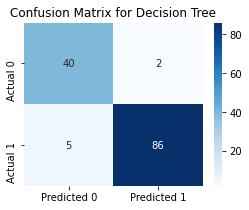



Model Name: Random Forest
Accuracy: 0.9849624060150376
Precision: 0.978494623655914
Recall: 1.0
F1 Score: 0.9891304347826088


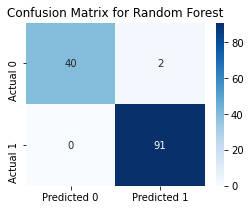



Model Name: Logistic Regression
Accuracy: 0.8872180451127819
Precision: 0.9042553191489362
Recall: 0.9340659340659341
F1 Score: 0.918918918918919


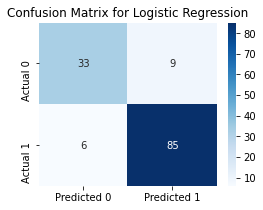



Model Name: Support Vector Machine
Accuracy: 0.9774436090225563
Precision: 1.0
Recall: 0.967032967032967
F1 Score: 0.9832402234636871


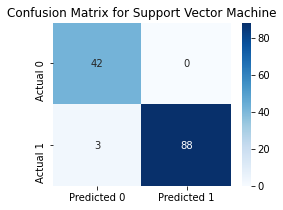



Model Name: K Nearest Neighbors
Accuracy: 0.9172932330827067
Precision: 0.9166666666666666
Recall: 0.967032967032967
F1 Score: 0.9411764705882353


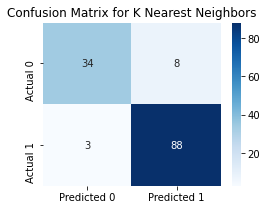

In [53]:
# plot confusion matrix for all models
for model_name, model in models_dict.items():
    plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test)

In [54]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.985,0.985,0.985,0.985
3,Support Vector Machine,0.977,0.979,0.977,0.978
0,Decision Tree,0.947,0.949,0.947,0.948
4,K Nearest Neighbors,0.917,0.917,0.917,0.916
2,Logistic Regression,0.887,0.886,0.887,0.886




Model Name: Keras DNN
Accuracy: 0.9398496240601504
Precision: 0.9662921348314607
Recall: 0.945054945054945
F1 Score: 0.9555555555555557


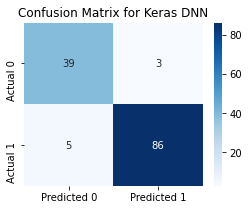

In [55]:
# DNN model
model = create_model(input_shape=(X_train.shape[1],), num_classes=2)

# train model
model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# scores
print(f'\n\nModel Name: Keras DNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))

if 'Keras DNN' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras DNN', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]


# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras DNN')
plt.show()


    


In [56]:
# LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=2)

# Reshape input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# train model
lstm_model.fit(X_train_reshaped, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis=-1)

# scores
print(f'\n\nModel Name: Keras LSTM')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))



# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras LSTM')
plt.show()

    
if 'Keras LSTM' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras LSTM', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]



AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)